In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 데이터

## 배추

In [3]:
cab_week = pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/new data/배추_전처리.csv",parse_dates=['SALEDATE'])

In [4]:
cab_week.set_index(['SALEDATE'],inplace=True)

In [5]:
cab_week.head()

TOT_QTY   PER_PRICE
SALEDATE                         
2014-01-05   956813.0  454.844834
2014-01-12  2387270.0  394.777742
2014-01-19  2263341.0  357.780162
2014-01-26  2592087.0  358.755185
2014-02-02  1179686.0  406.748236

In [6]:
# 총 물량 & 단위 당 가격 시각화
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=cab_week.index, y=cab_week['PER_PRICE'], name='단위 당 가격(kg)'))
fig.add_trace(go.Scatter(x=cab_week.index, y=cab_week['TOT_QTY'], name='총 물량'), secondary_y=True)

# Set y-axes titles
fig.update_yaxes(title_text="단위 당 가격(kg)", secondary_y=False)
fig.update_yaxes(title_text="총 물량", secondary_y=True)

fig.update_layout(title_text='배추 - 총 물량 & 단위 가격')

fig.show()

## 배추_소매

In [7]:
cab_sm_week = pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/new data/배추_소매_전처리.csv", parse_dates=['일자'])

In [8]:
cab_sm_week.set_index(['일자'],inplace=True)

In [9]:
cab_sm_week

가격
일자                     
2014-01-05  2249.803922
2014-01-12  2244.315242
2014-01-19  2163.692308
2014-01-26  2104.000000
2014-02-02  2067.500000
...                 ...
2021-11-07  3543.605400
2021-11-14  3909.497929
2021-11-21  3943.364905
2021-11-28  4059.778812
2021-12-05  4078.928571

[414 rows x 1 columns]

In [10]:
fig = px.line(cab_sm_week, x=cab_sm_week.index, y='가격')
fig.update_layout(title_text='주별 배추 소매가격')
fig.show()

In [11]:
# 총 물량 & 단위 당 가격 시각화
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=cab_week.index, y=cab_week['PER_PRICE'], name='단위 당 가격(kg)'))
fig.add_trace(go.Scatter(x=cab_sm_week.index, y=cab_sm_week['가격'], name='소매 가격'), secondary_y=True)

# Set y-axes titles
fig.update_yaxes(title_text="단위 당 가격(kg)", secondary_y=False)
fig.update_yaxes(title_text="소매 가격", secondary_y=True)

fig.update_layout(title_text='배추 - 총 물량 & 단위 가격')

fig.show()

## 환율 데이터

In [12]:
# 환율 데이터 불러오기
dollar =  pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/new data/환율_주 단위.csv",parse_dates=['일자'])

In [13]:
dollar.head()

일자        매매기준율
0 2014-01-05  1053.875000
1 2014-01-12  1064.142857
2 2014-01-19  1060.928571
3 2014-01-26  1073.071429
4 2014-02-02  1074.500000

In [14]:
fig = px.line(dollar, x='일자', y='매매기준율')
fig.update_layout(title_text='환율')
fig.show()

## 날씨 데이터

In [15]:
# 날씨 데이터(강원도/전라남도)
gw =  pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/weather/강원도_전처리.csv",parse_dates=['일시'], encoding='cp949')
jn =  pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/weather/전라남도_전처리.csv",parse_dates=['일시'], encoding='cp949')

In [16]:
# 강원도 + 전라남도 날씨 데이터
total_weather = gw.set_index(['일시']) * 0.53 + jn.set_index(['일시']) * 0.47

In [17]:
total_weather.reset_index(inplace=True)

In [18]:
total_weather.head()

일시  평균기온(°C)  최저기온(°C)   최고기온(°C)  일강수량(mm)  평균 이슬점온도(°C)  \
0 2014-01-05  2.408477 -2.148169   7.509015  0.845577     -5.962985   
1 2014-01-12 -0.898121 -5.680187   4.224132  0.447588     -9.086670   
2 2014-01-19 -2.113451 -7.330857   3.499835  0.046440    -11.002264   
3 2014-01-26  0.581110 -4.022253   5.495648  1.801843     -4.860033   
4 2014-02-02  4.382319 -1.525989  10.069989  1.974447     -2.491319   

   평균 상대습도(%)  합계 일사량(MJ/m2)  일 최심적설(cm)  평균 지면온도(°C)  
0   58.626215       8.686347    1.595300     1.342477  
1   57.427879       8.367654    1.528310    -0.679824  
2   54.542418      10.465990    0.077214    -1.722890  
3   69.709956       8.443759    4.953383     0.929736  
4   67.089604       8.738002    0.744524     3.221593

In [19]:
# 날씨 시각화
fig = go.Figure()
for feature in total_weather.columns[1:]:
    fig.add_trace(go.Scatter(x=total_weather['일시'], y=total_weather[feature], name= feature))

fig.update_layout(title_text="가중평균 날씨")

fig.show()

## 데이터 병합

In [20]:
cab_weather = pd.merge(cab_week, total_weather, how='left',left_on='SALEDATE', right_on='일시').set_index(['일시'])
cab_dollar = pd.merge(cab_weather, dollar[['일자','매매기준율']], how='left',left_on='일시', right_on='일자').set_index(['일자'])
cab_total = pd.merge(cab_dollar, cab_sm_week, how='left',left_on='일자', right_on='일자')

In [21]:
cab_total

TOT_QTY   PER_PRICE   평균기온(°C)   최저기온(°C)   최고기온(°C)  일강수량(mm)  \
일자                                                                              
2014-01-05   956813.00  454.844834   2.408477  -2.148169   7.509015  0.845577   
2014-01-12  2387270.00  394.777742  -0.898121  -5.680187   4.224132  0.447588   
2014-01-19  2263341.00  357.780162  -2.113451  -7.330857   3.499835  0.046440   
2014-01-26  2592087.00  358.755185   0.581110  -4.022253   5.495648  1.801843   
2014-02-02  1179686.00  406.748236   4.382319  -1.525989  10.069989  1.974447   
...                ...         ...        ...        ...        ...       ...   
2021-10-03  7597955.70  617.564724  20.531349  16.725163  25.763513  4.293184   
2021-10-10  7701011.65  501.742228  20.947310  17.482772  25.071104  5.608289   
2021-10-17  7744317.45  397.339768  15.505961  11.912571  19.958319  3.179286   
2021-10-24  7741324.90  503.654246  10.021250   4.832877  16.688693  0.985866   
2021-10-31  9256895.70  531.915725  11.881445   6.303384  19.124568  0.195325   

            평균 이슬점온도(°C)  평균 상대습도(%)  합계 일사량(MJ/m2)  일 최심적설(cm)  평균 지면온도(°C)  \
일자                                                                             
2014-01-05     -5.962985   58.626215       8.686347    1.595300     1.342477   
2014-01-12     -9.086670   57.427879       8.367654    1.528310    -0.679824   
2014-01-19    -11.002264   54.542418      10.465990    0.077214    -1.722890   
2014-01-26     -4.860033   69.709956       8.443759    4.953383     0.929736   
2014-02-02     -2.491319   67.089604       8.738002    0.744524     3.221593   
...                  ...         ...            ...         ...          ...   
2021-10-03     17.130203   82.875754      13.705361    0.000000    22.559746   
2021-10-10     18.177324   85.913760       9.678367    0.000000    22.077024   
2021-10-17     10.773319   75.889196      10.263259    0.000000    17.473725   
2021-10-24      3.950222   69.749881      14.070102    0.000000    12.024799   
2021-10-31      5.975336   71.024688      13.347257    0.000000    12.613181   

                  매매기준율           가격  
일자                                    
2014-01-05  1053.875000  2249.803922  
2014-01-12  1064.142857  2244.315242  
2014-01-19  1060.928571  2163.692308  
2014-01-26  1073.071429  2104.000000  
2014-02-02  1074.500000  2067.500000  
...                 ...          ...  
2021-10-03  1185.714286  4951.765275  
2021-10-10  1192.785714  4453.672111  
2021-10-17  1188.857143  3846.446612  
2021-10-24  1178.071429  3460.793103  
2021-10-31  1172.000000  3402.992740  

[409 rows x 13 columns]

In [22]:
cab_total['가격'] = cab_total['가격'].interpolate(method='values')

### 월별 BOX PLOT

In [23]:
cab_total_vi = cab_total.copy()

In [24]:
cab_total_vi['month'] = cab_total.index.month
cab_total_vi['year'] = cab_total.index.year

In [25]:
years = cab_total_vi.index.year.unique()

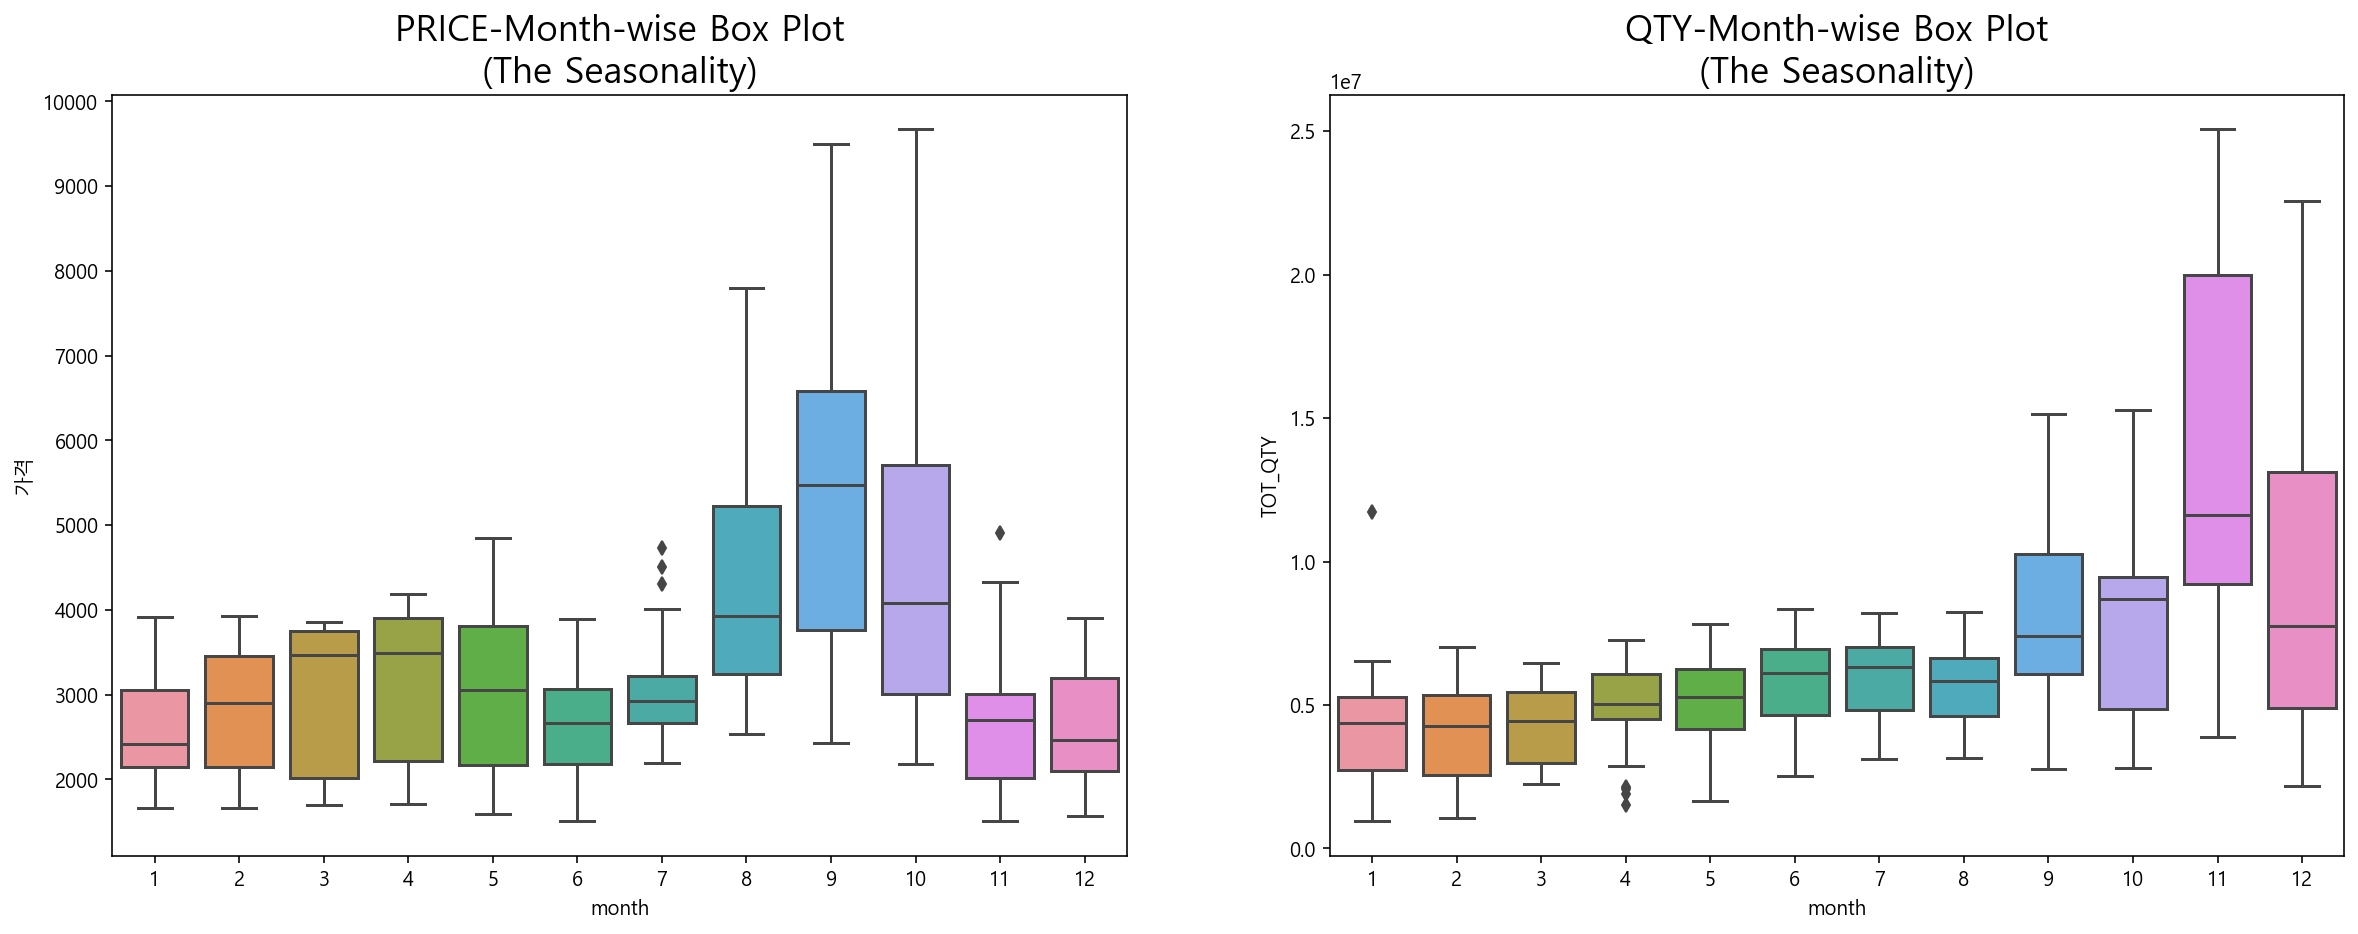

In [26]:
import matplotlib as mpl

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(x='month', y='가격', data=cab_total_vi, ax=axes[0])
sns.boxplot(x='month', y='TOT_QTY', data=cab_total_vi)

# Set Title
axes[0].set_title('PRICE-Month-wise Box Plot\n(The Seasonality)', fontsize=18); 
axes[1].set_title('QTY-Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# 통계적 분석

In [27]:
from statsmodels.tsa.stattools import adfuller 

def adfuller_test(series, signif=0.1, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':r[1], 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {key} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [28]:
# KPSS test
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value <= 0.1 else ""}stationary')

### 가격

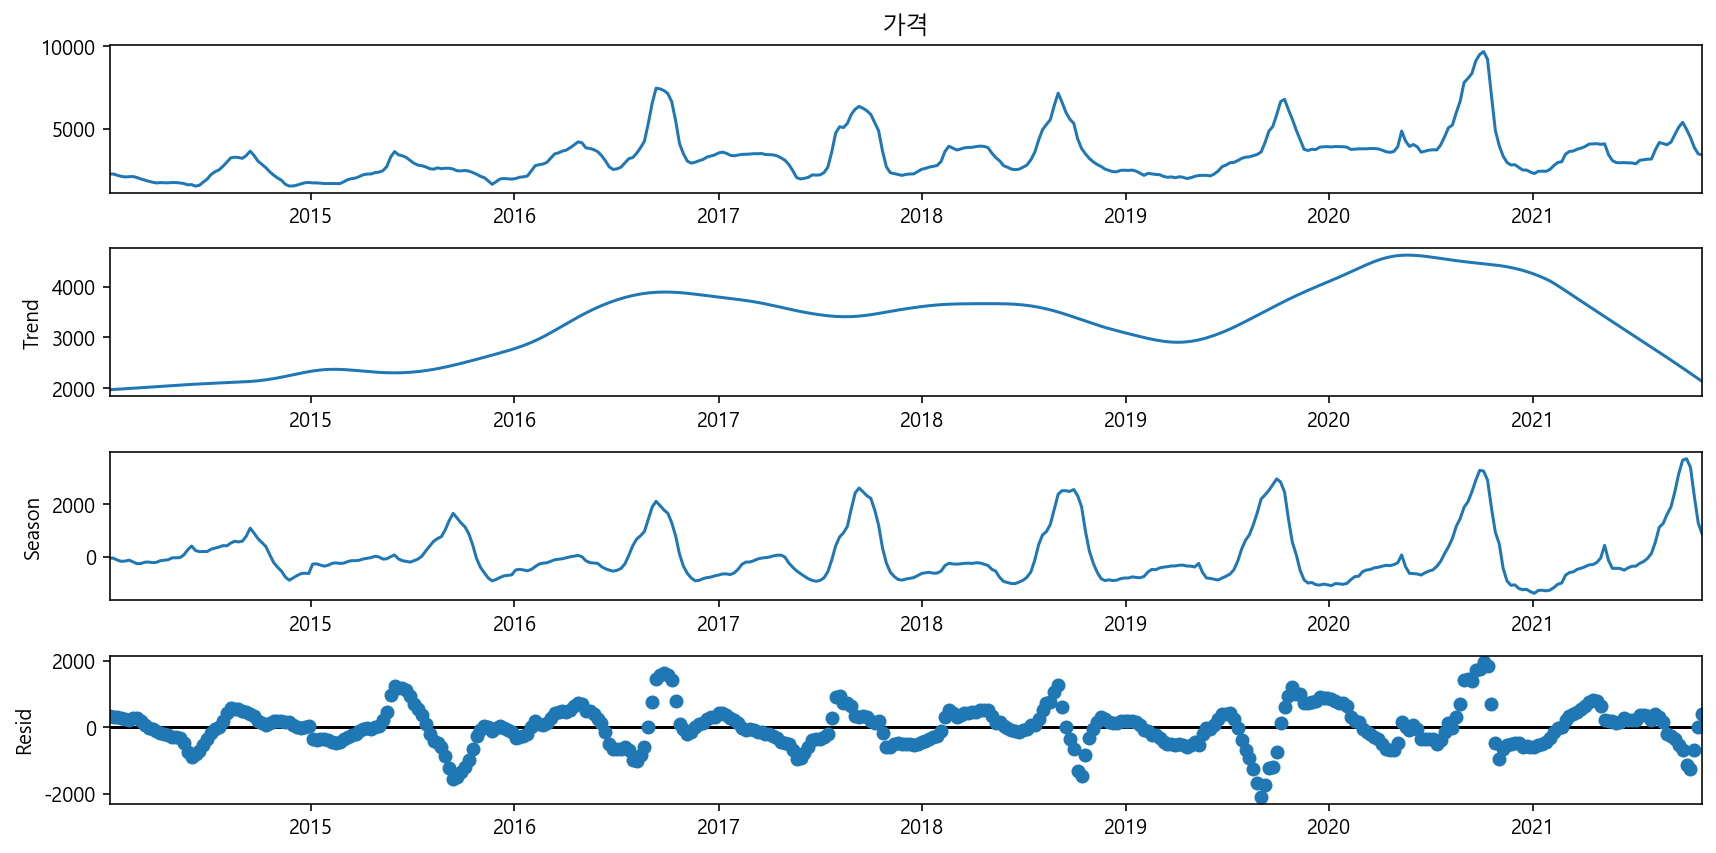

In [29]:
from statsmodels.tsa.seasonal import STL

res_price = STL(cab_total['가격']).fit()
ax=res_price.plot()
plt.show()

In [30]:
adfuller_test(cab_total['가격'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -6.0802
 No. Lags Chosen       = 3
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 1.0969485940607523e-07. Rejecting Null Hypothesis.
 => Series is Stationary.


In [31]:
kpss_test(cab_total['가격'])

KPSS Statistic: 0.7728764865806471
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


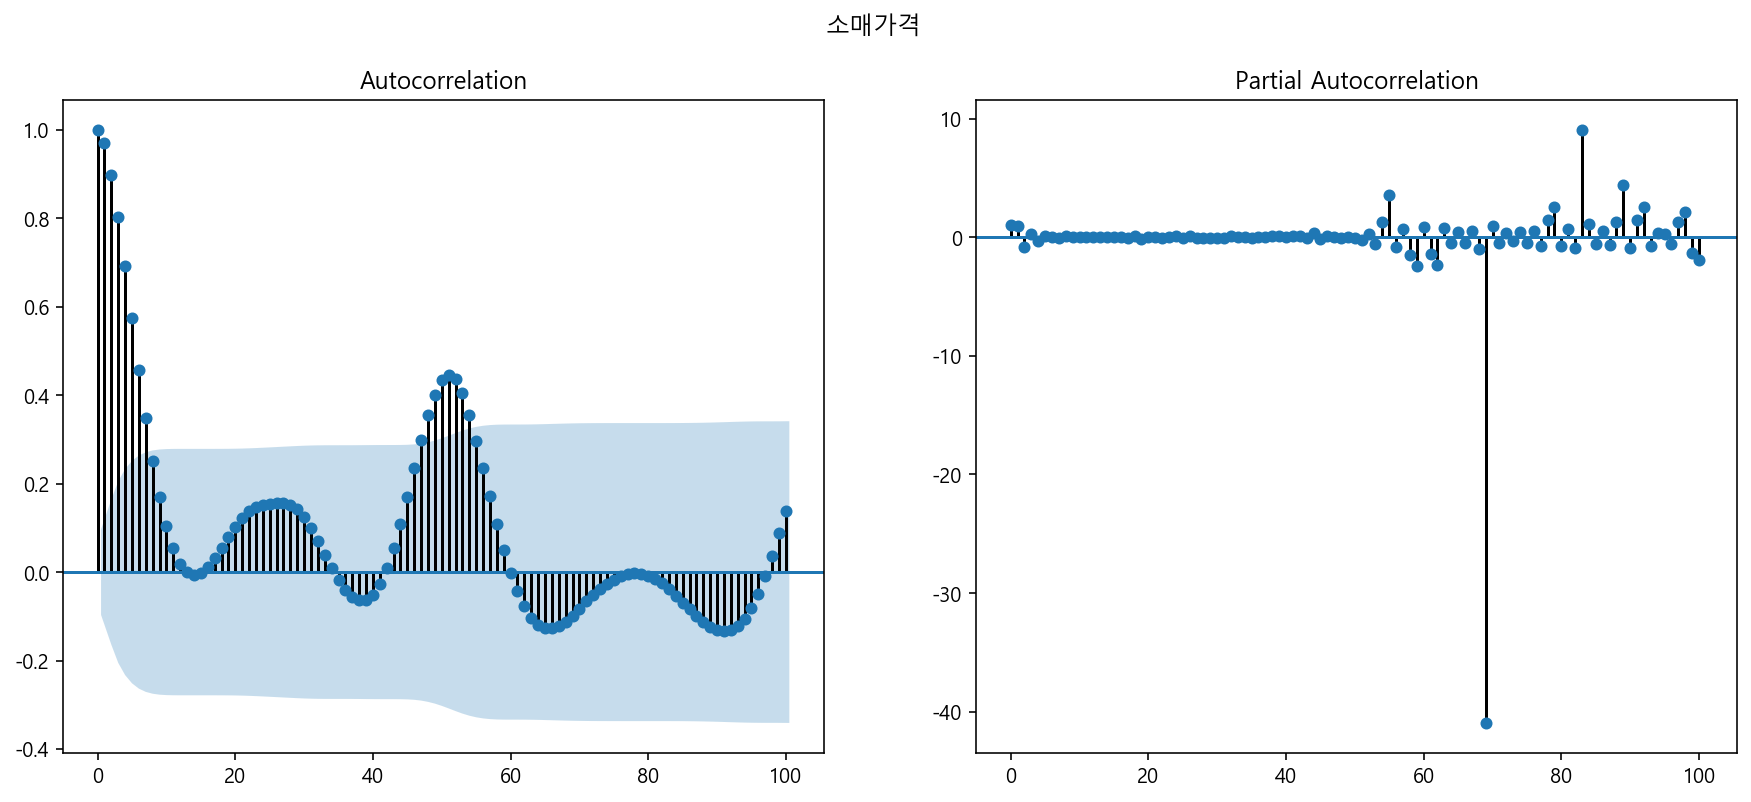

In [32]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("소매가격")
sm.graphics.tsa.plot_acf(cab_total['가격'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['가격'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

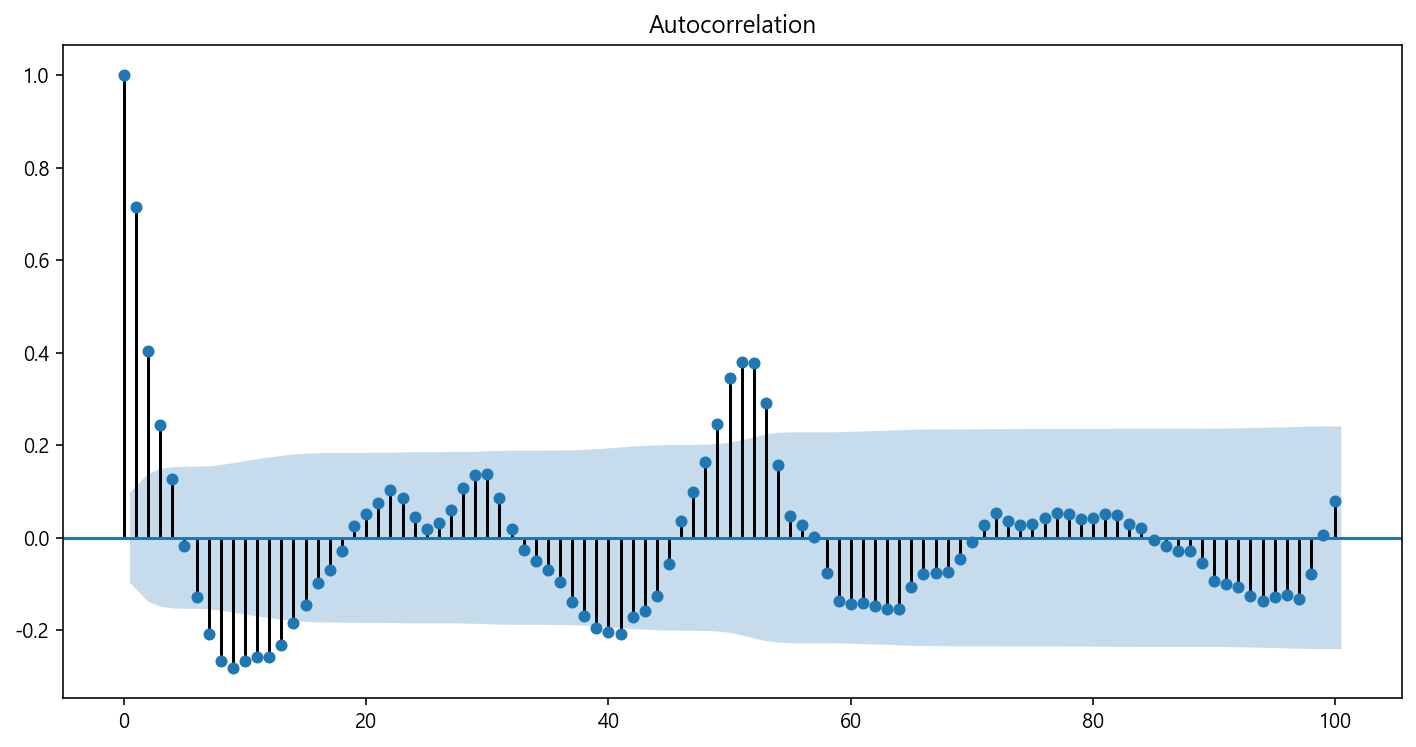

In [33]:
seasonal_lag = 1
sm.graphics.tsa.plot_acf(cab_total['가격'].diff(seasonal_lag).dropna(), lags=100);
plt.show()

**0.1 정상/비정상 0.05 정상/비정상**

### PER_PRICE

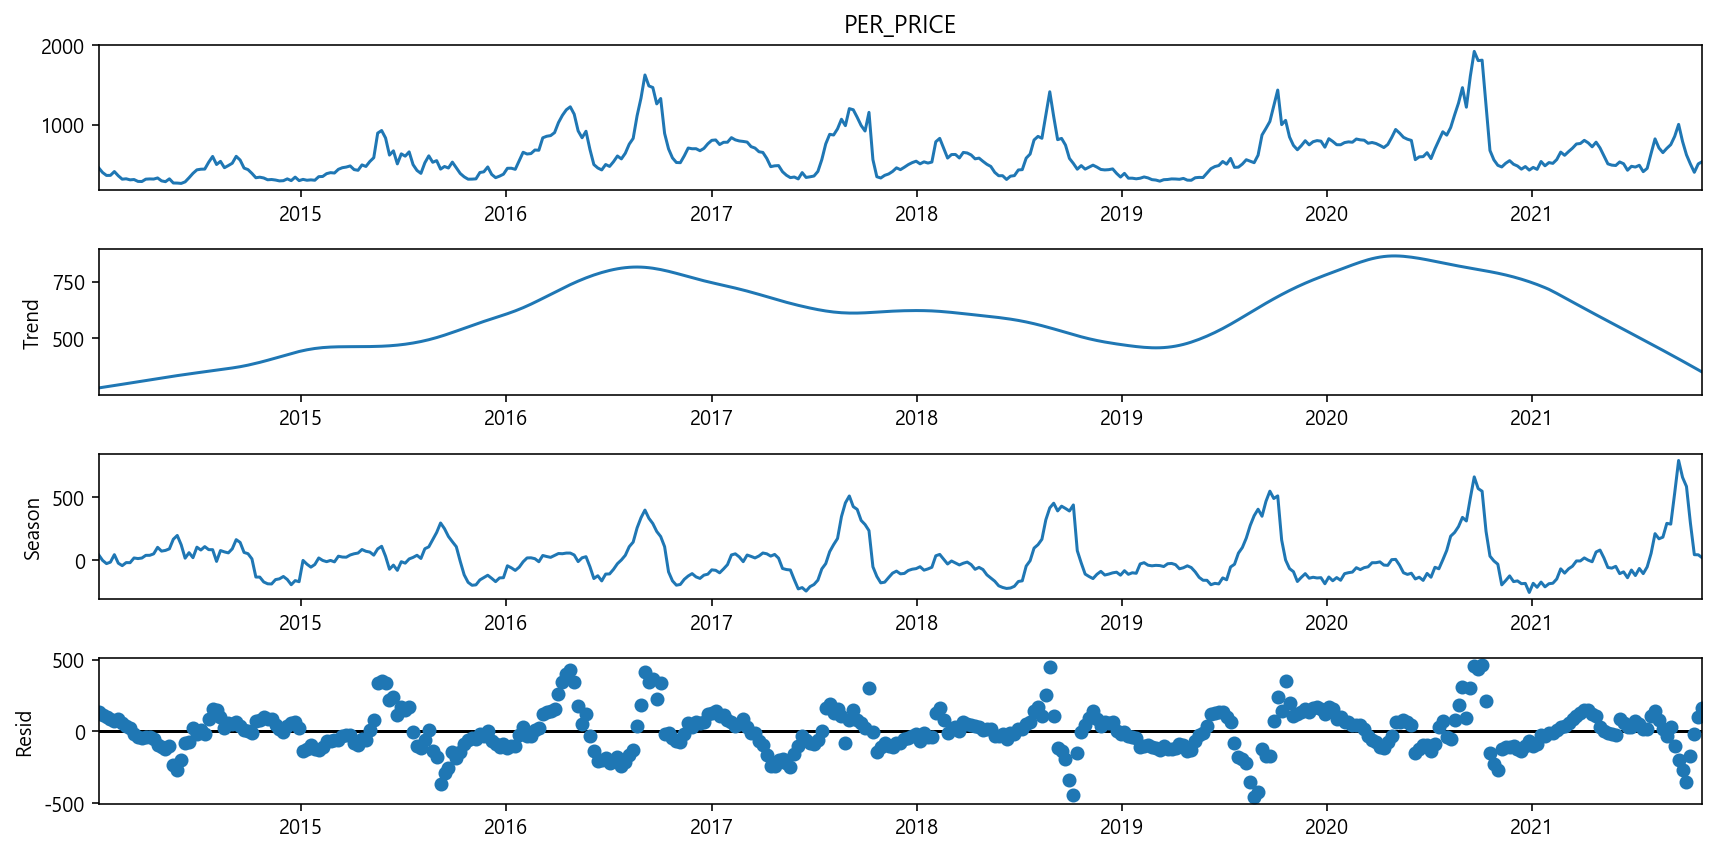

In [34]:
from statsmodels.tsa.seasonal import STL

res_price = STL(cab_total['PER_PRICE']).fit()
ax=res_price.plot()
plt.show()

In [35]:
adfuller_test(cab_total['PER_PRICE'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -5.6905
 No. Lags Chosen       = 4
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 8.092711612509955e-07. Rejecting Null Hypothesis.
 => Series is Stationary.


In [36]:
kpss_test(cab_total['PER_PRICE'])

KPSS Statistic: 0.4475425831670822
p-value: 0.05666267966936114
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


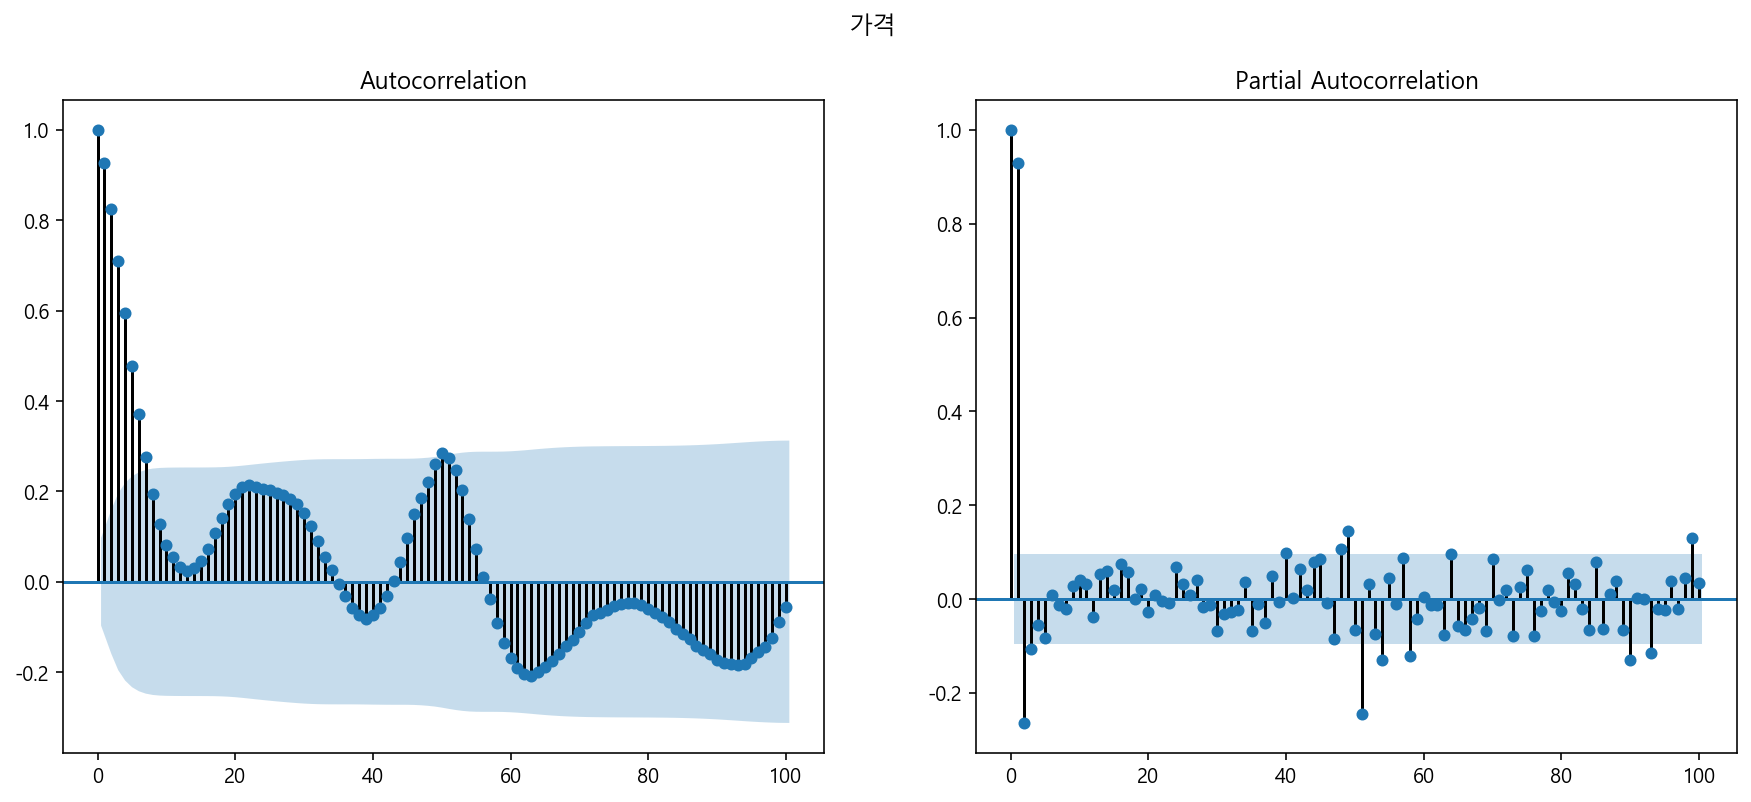

In [37]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("가격")
sm.graphics.tsa.plot_acf(cab_total['PER_PRICE'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['PER_PRICE'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

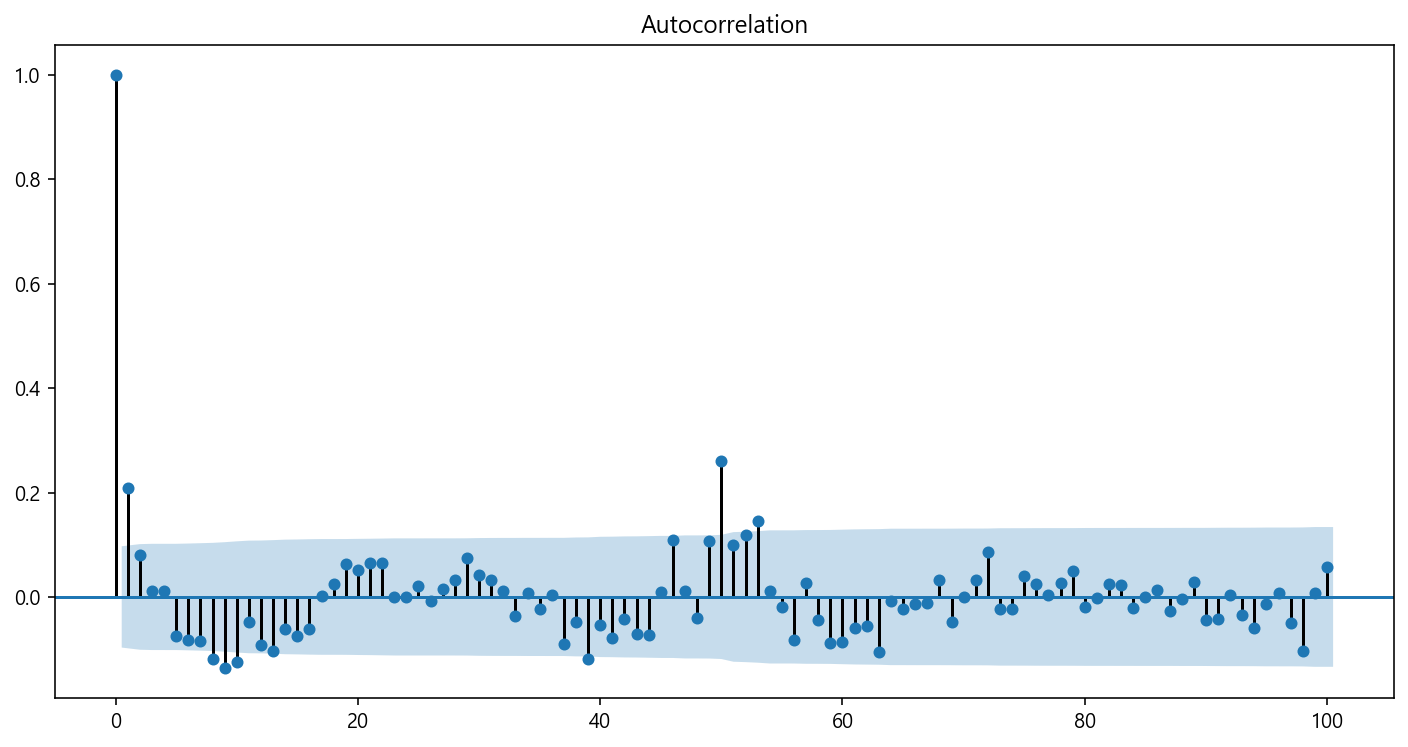

In [38]:
seasonal_lag = 1
sm.graphics.tsa.plot_acf(cab_total['PER_PRICE'].diff(seasonal_lag).dropna(), lags=100);
plt.show()

In [39]:
kpss_test(cab_total['PER_PRICE'].diff(seasonal_lag).dropna())

KPSS Statistic: 0.032353411852354165
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


### TOT_QTY

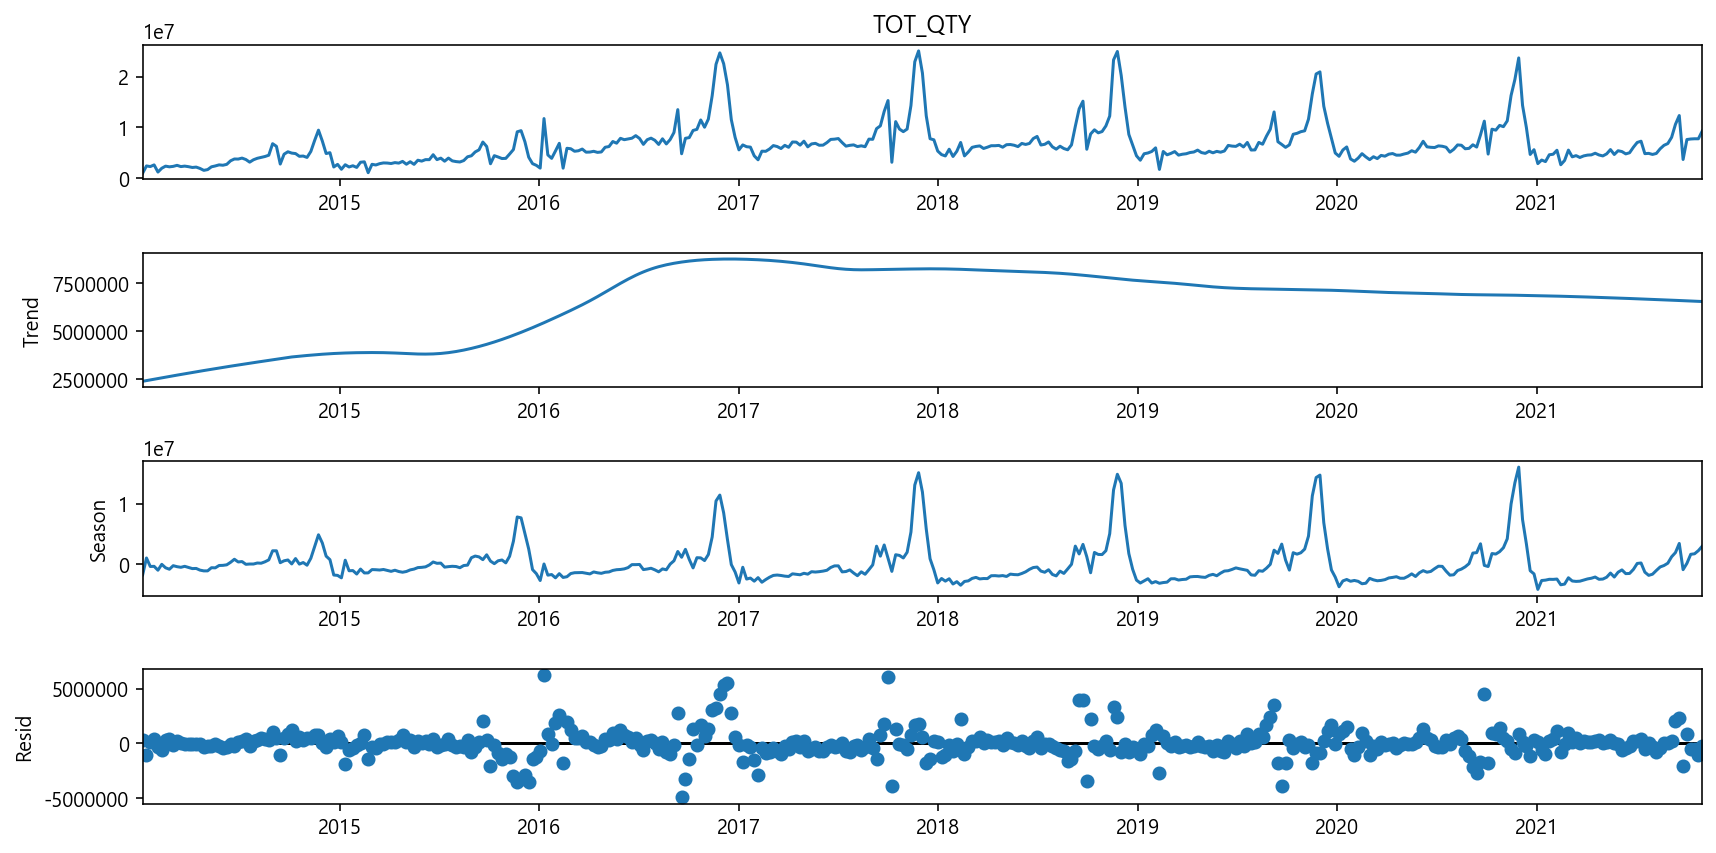

In [40]:
res_qty= STL(cab_total['TOT_QTY']).fit()
ax=res_qty.plot()
plt.show()

In [41]:
adfuller_test(cab_total['TOT_QTY'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -6.6855
 No. Lags Chosen       = 2
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 4.2361413392726506e-09. Rejecting Null Hypothesis.
 => Series is Stationary.


In [42]:
kpss_test(cab_total['TOT_QTY'])

KPSS Statistic: 0.5485021832357811
p-value: 0.03074275152347271
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


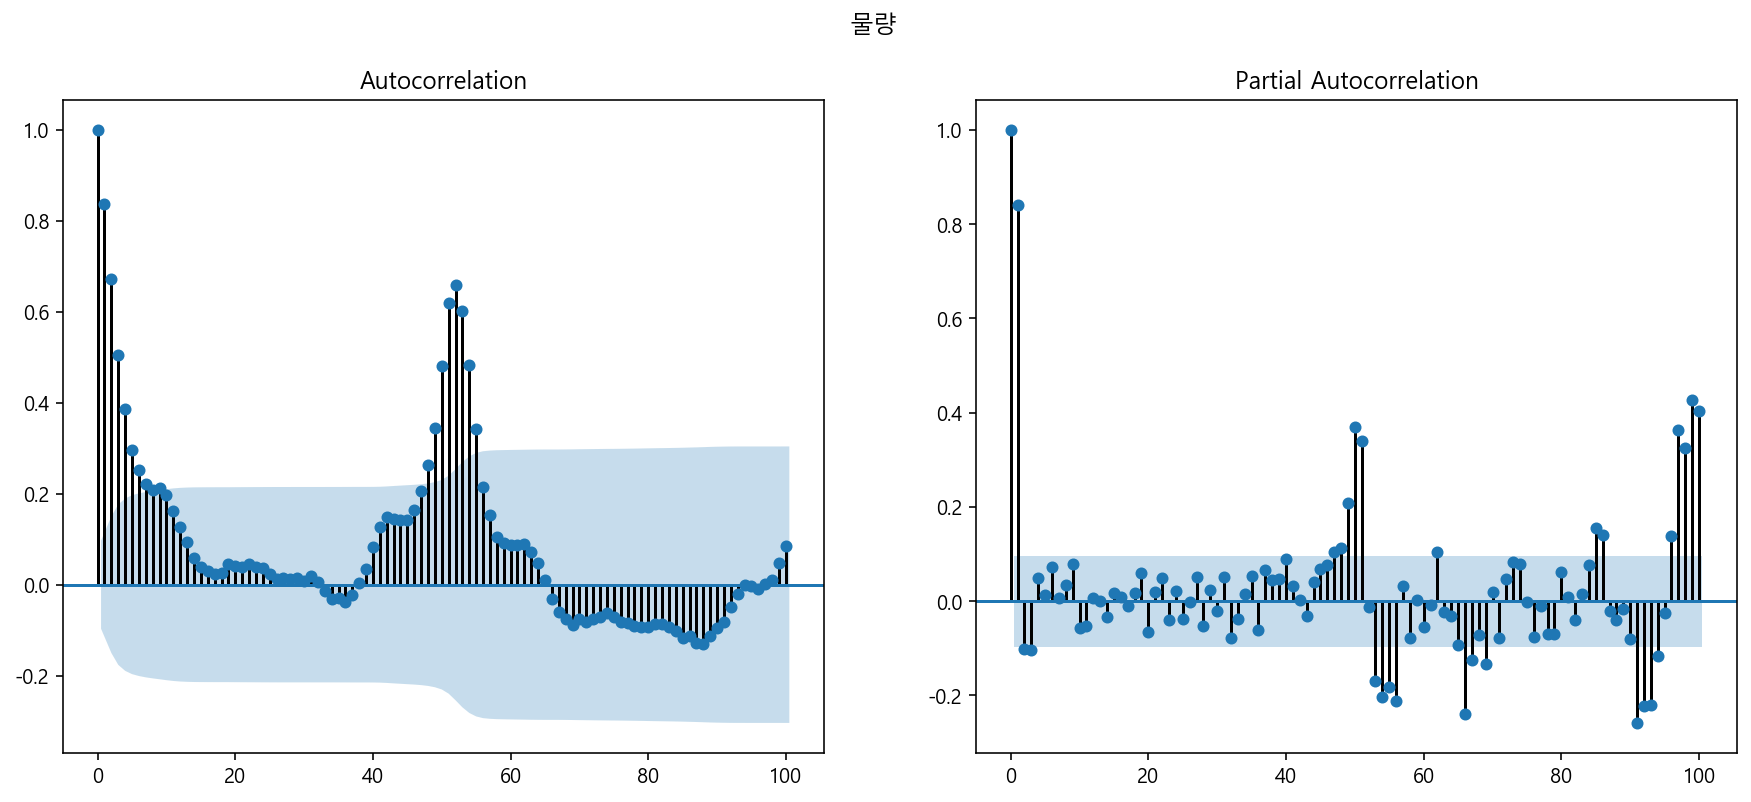

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("물량")
sm.graphics.tsa.plot_acf(cab_total['TOT_QTY'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['TOT_QTY'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

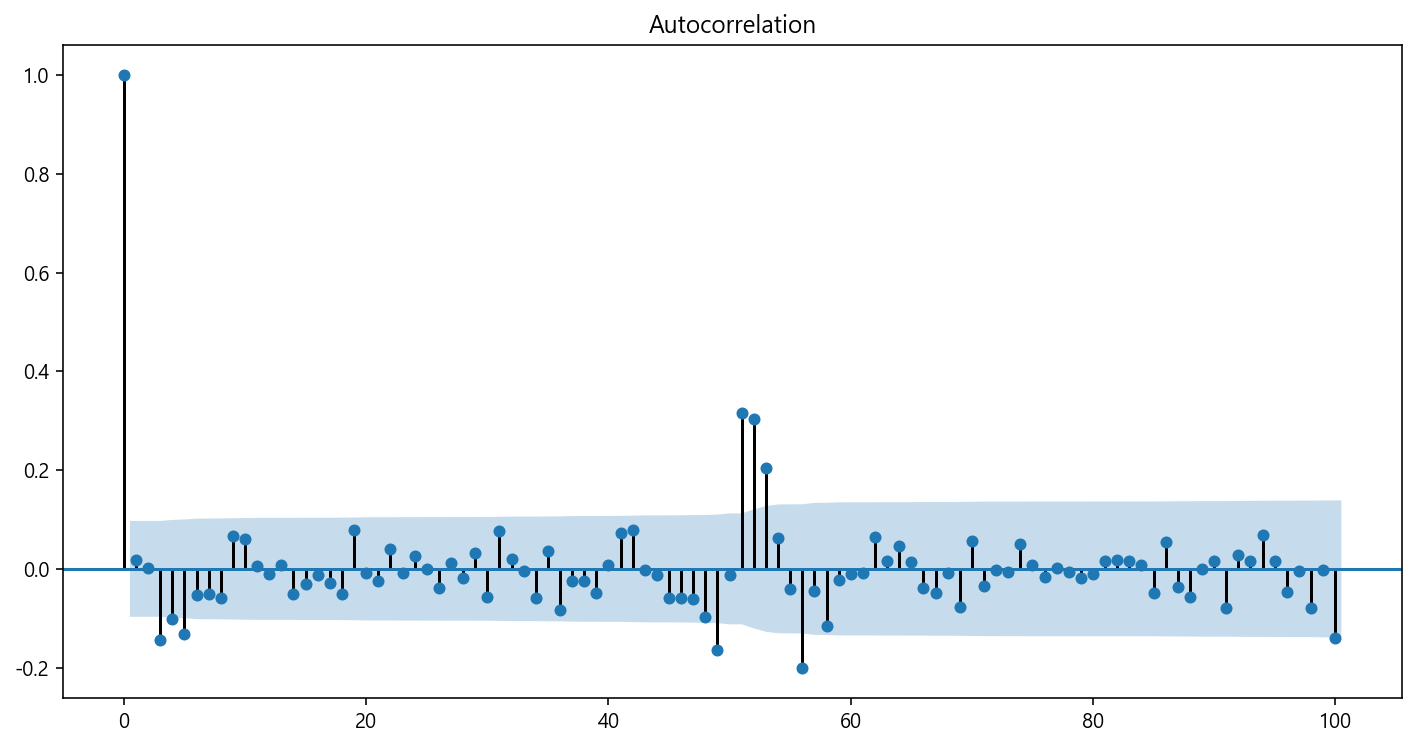

In [44]:
seasonal_lag = 1
sm.graphics.tsa.plot_acf(cab_total['TOT_QTY'].diff(seasonal_lag).dropna(), lags=100);
plt.show()

In [45]:
kpss_test((cab_total['TOT_QTY'].diff(seasonal_lag).dropna()))

KPSS Statistic: 0.029282444830324036
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


### 평균기온(°C)

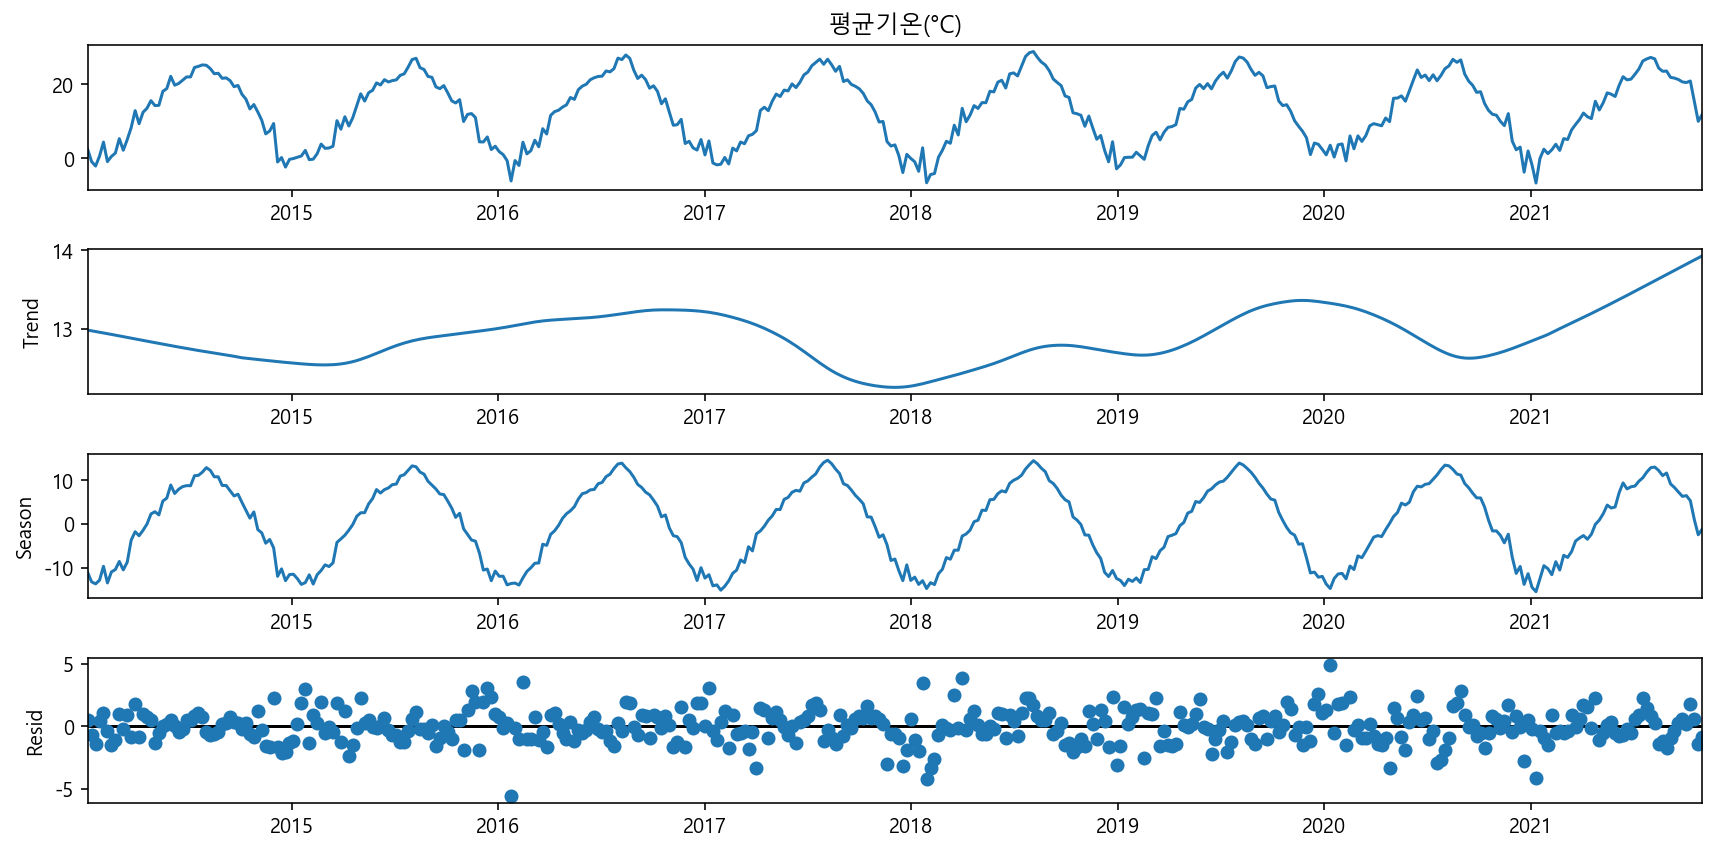

In [46]:
res_mtmp= STL(cab_total['평균기온(°C)']).fit()
ax=res_mtmp.plot()
plt.show()

In [47]:
adfuller_test(cab_total['평균기온(°C)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -9.679
 No. Lags Chosen       = 17
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 1.219146675420449e-16. Rejecting Null Hypothesis.
 => Series is Stationary.


In [48]:
kpss_test(cab_total['평균기온(°C)'])

KPSS Statistic: 0.03263543730865236
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


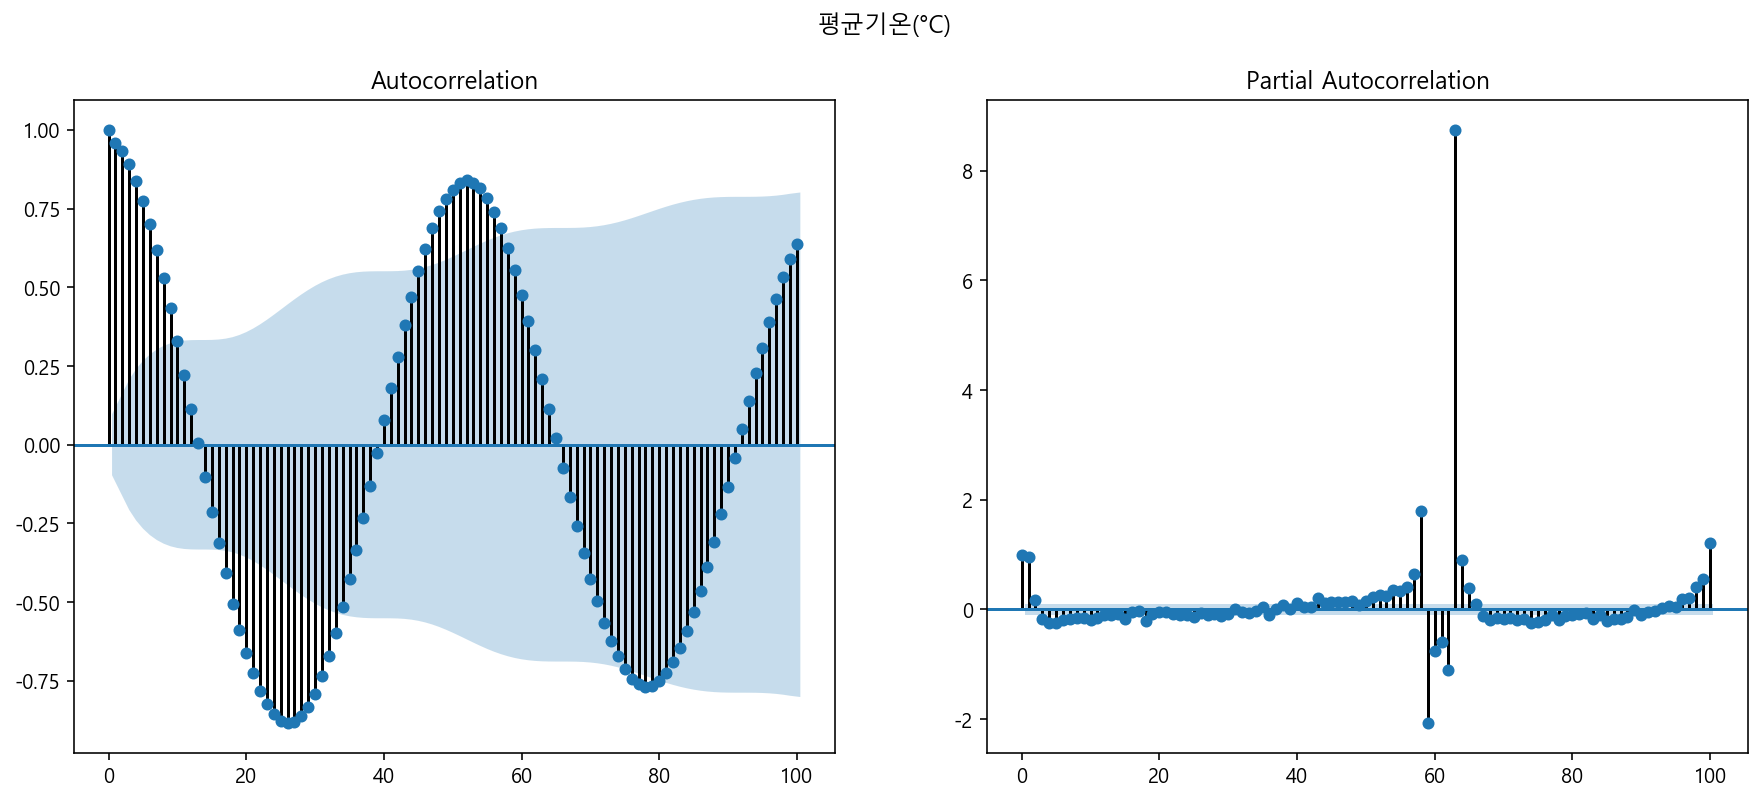

In [49]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("평균기온(°C)")
sm.graphics.tsa.plot_acf(cab_total['평균기온(°C)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['평균기온(°C)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

In [50]:
kpss_test(cab_total['평균기온(°C)'] - res_mtmp.seasonal)

KPSS Statistic: 0.1543320232196386
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


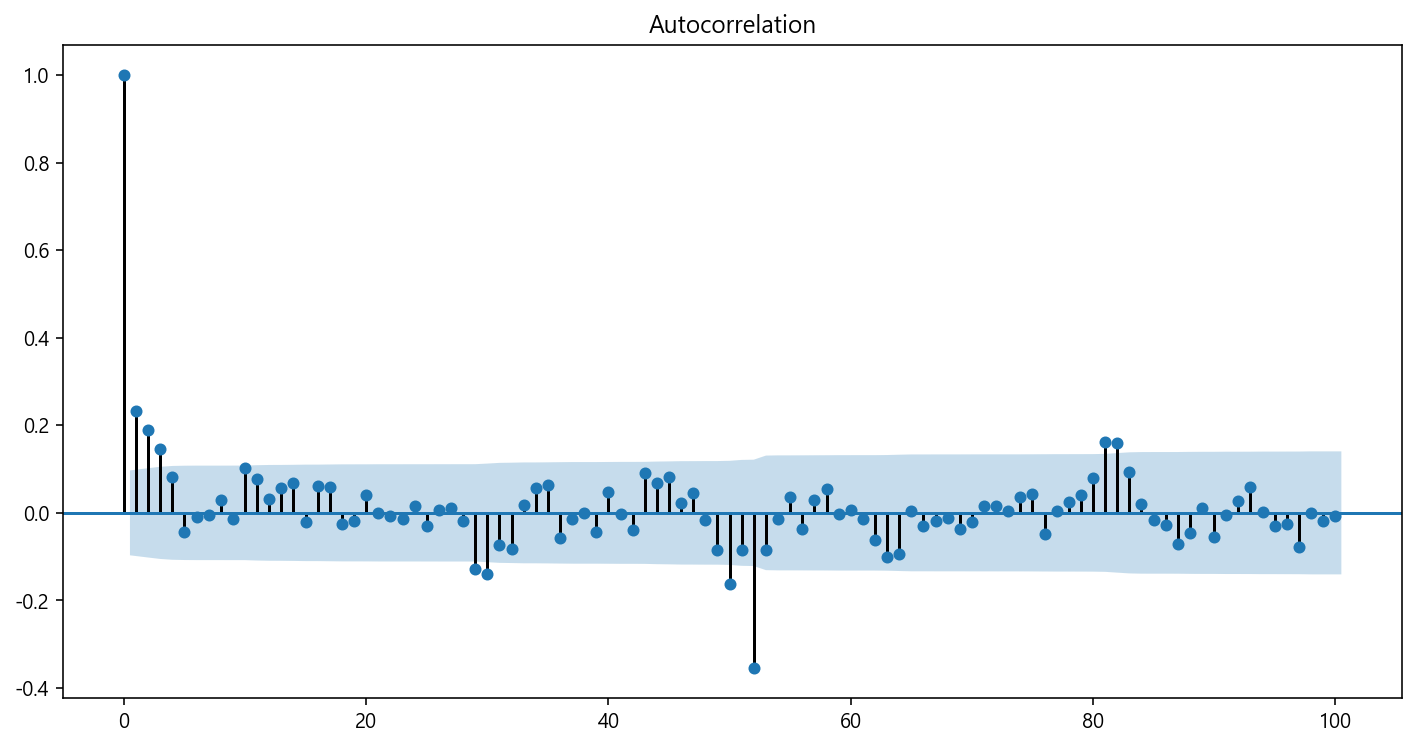

In [51]:
sm.graphics.tsa.plot_acf(cab_total['평균기온(°C)'] - res_mtmp.seasonal, lags=100)
plt.show()

### 최저기온(°C)

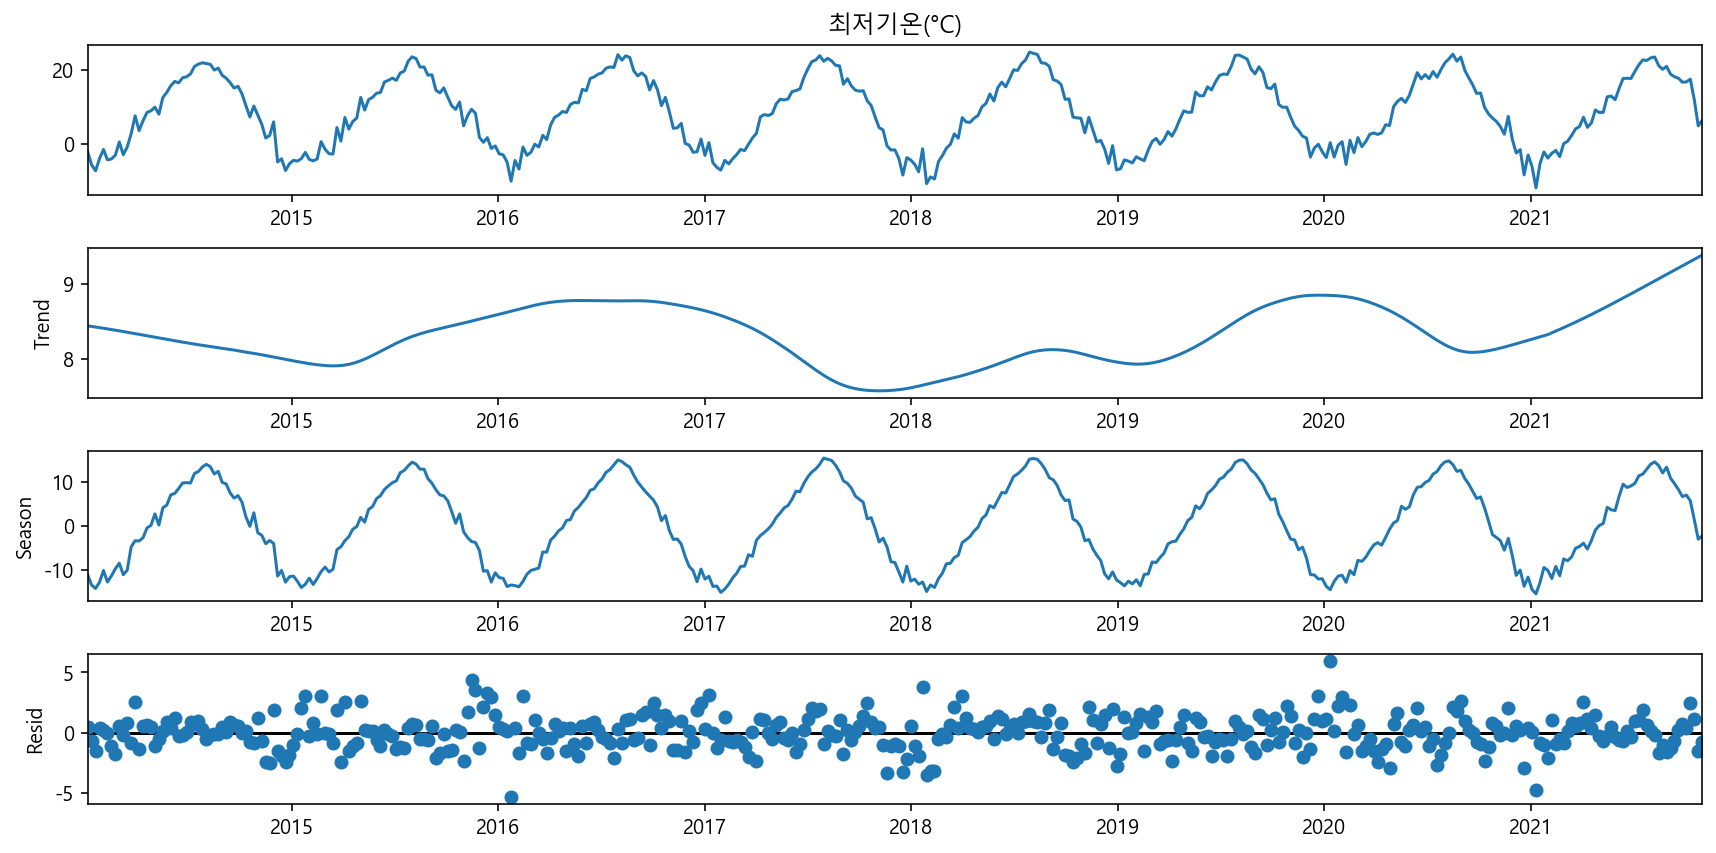

In [52]:
res_ltmp= STL(cab_total['최저기온(°C)']).fit()
ax=res_ltmp.plot()
plt.show()

In [53]:
adfuller_test(cab_total['최저기온(°C)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -9.7247
 No. Lags Chosen       = 18
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 9.340539434355312e-17. Rejecting Null Hypothesis.
 => Series is Stationary.


In [54]:
kpss_test(cab_total['최저기온(°C)'])

KPSS Statistic: 0.032760140545756954
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


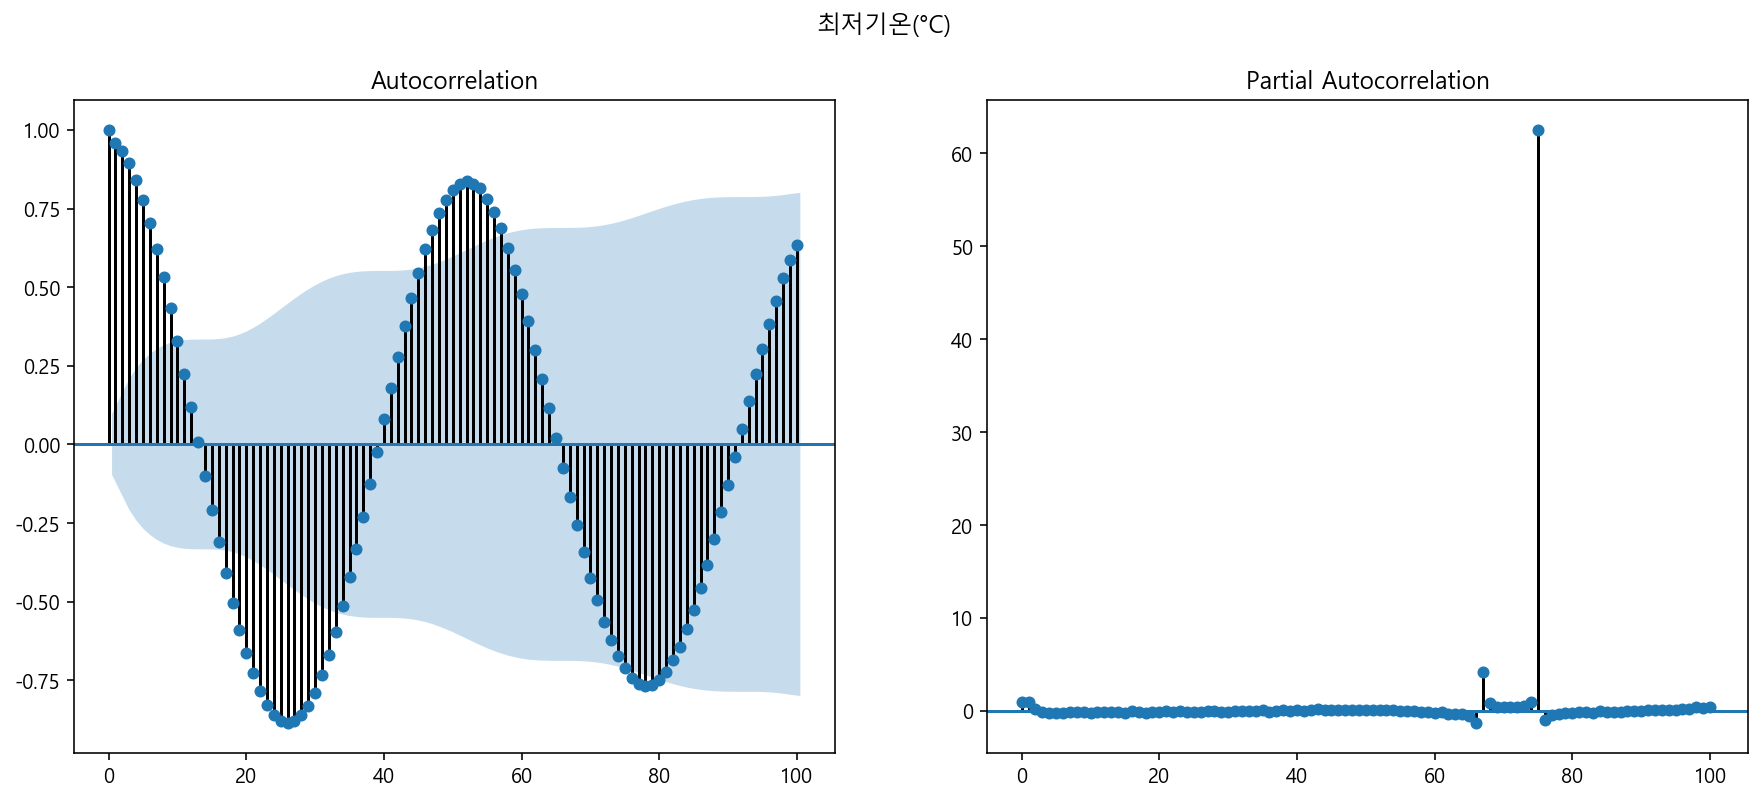

In [55]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("최저기온(°C)")
sm.graphics.tsa.plot_acf(cab_total['최저기온(°C)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['최저기온(°C)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 최고기온(°C)

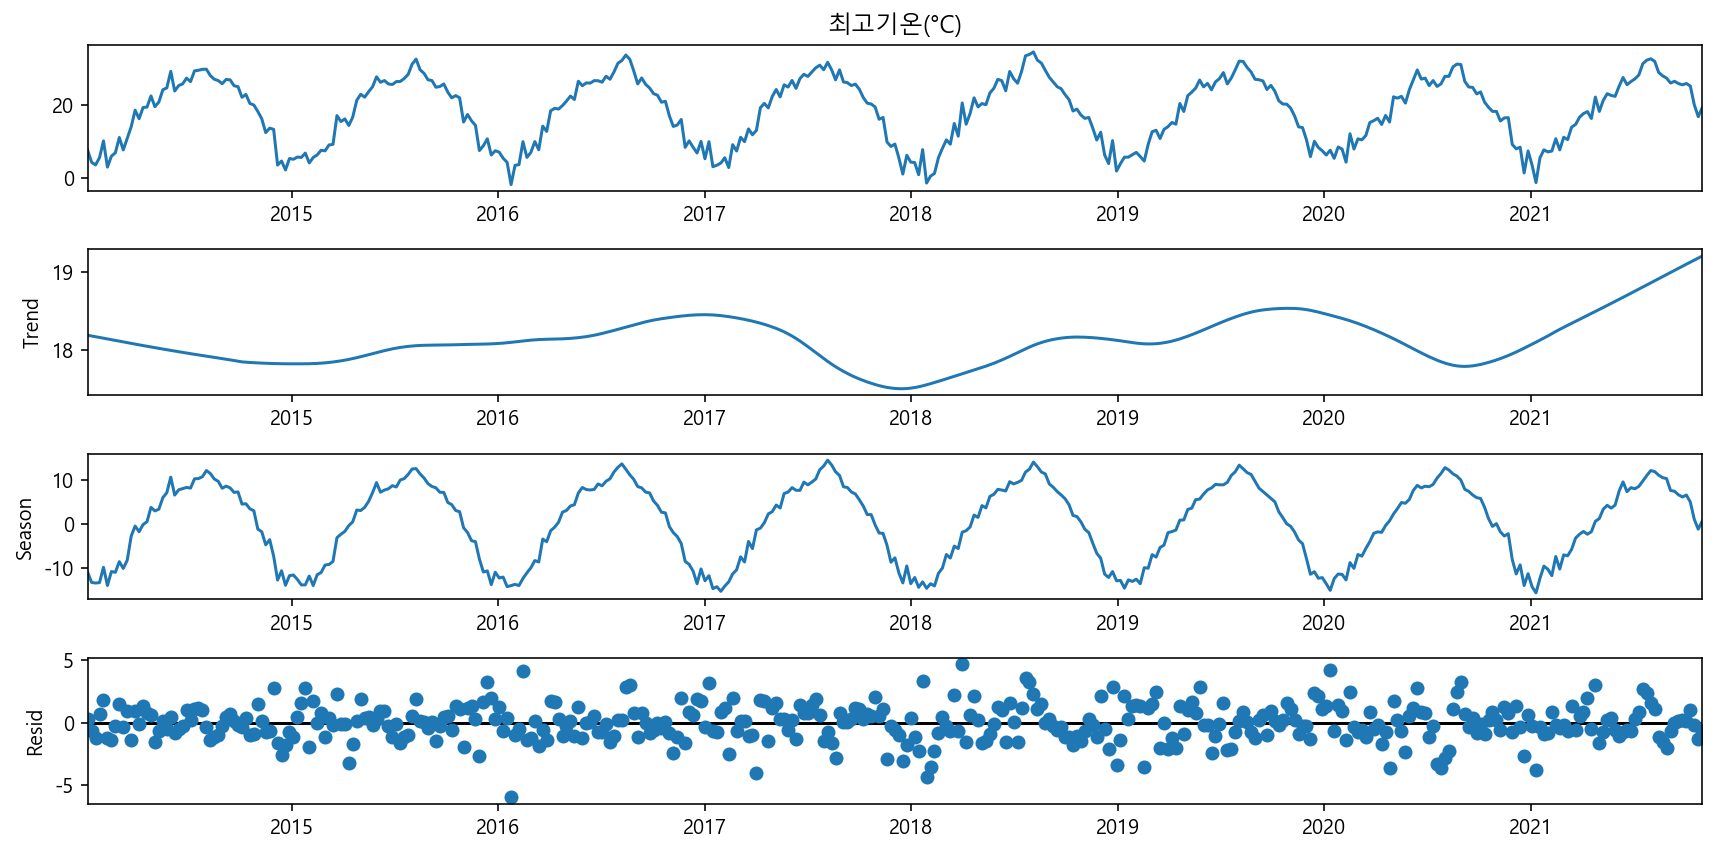

In [56]:
res_htmp= STL(cab_total['최고기온(°C)']).fit()
ax=res_htmp.plot()
plt.show()

In [57]:
adfuller_test(cab_total['최고기온(°C)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -8.7441
 No. Lags Chosen       = 17
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 2.954754828394892e-14. Rejecting Null Hypothesis.
 => Series is Stationary.


In [58]:
kpss_test(cab_total['최고기온(°C)'])

KPSS Statistic: 0.032520892091663714
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


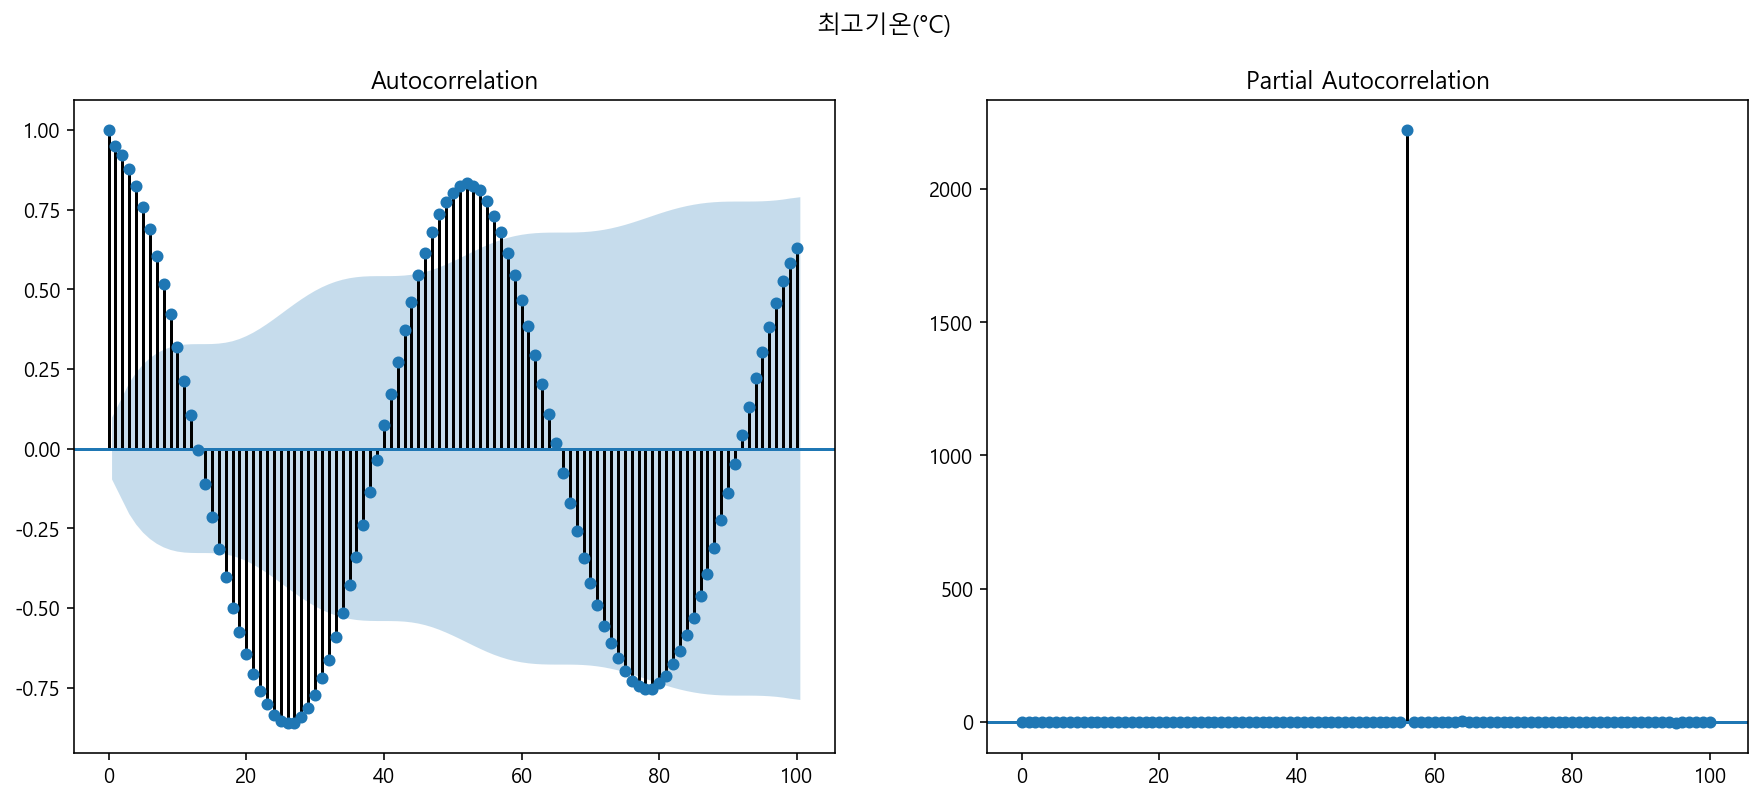

In [59]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("최고기온(°C)")
sm.graphics.tsa.plot_acf(cab_total['최고기온(°C)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['최고기온(°C)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 일강수량(mm)

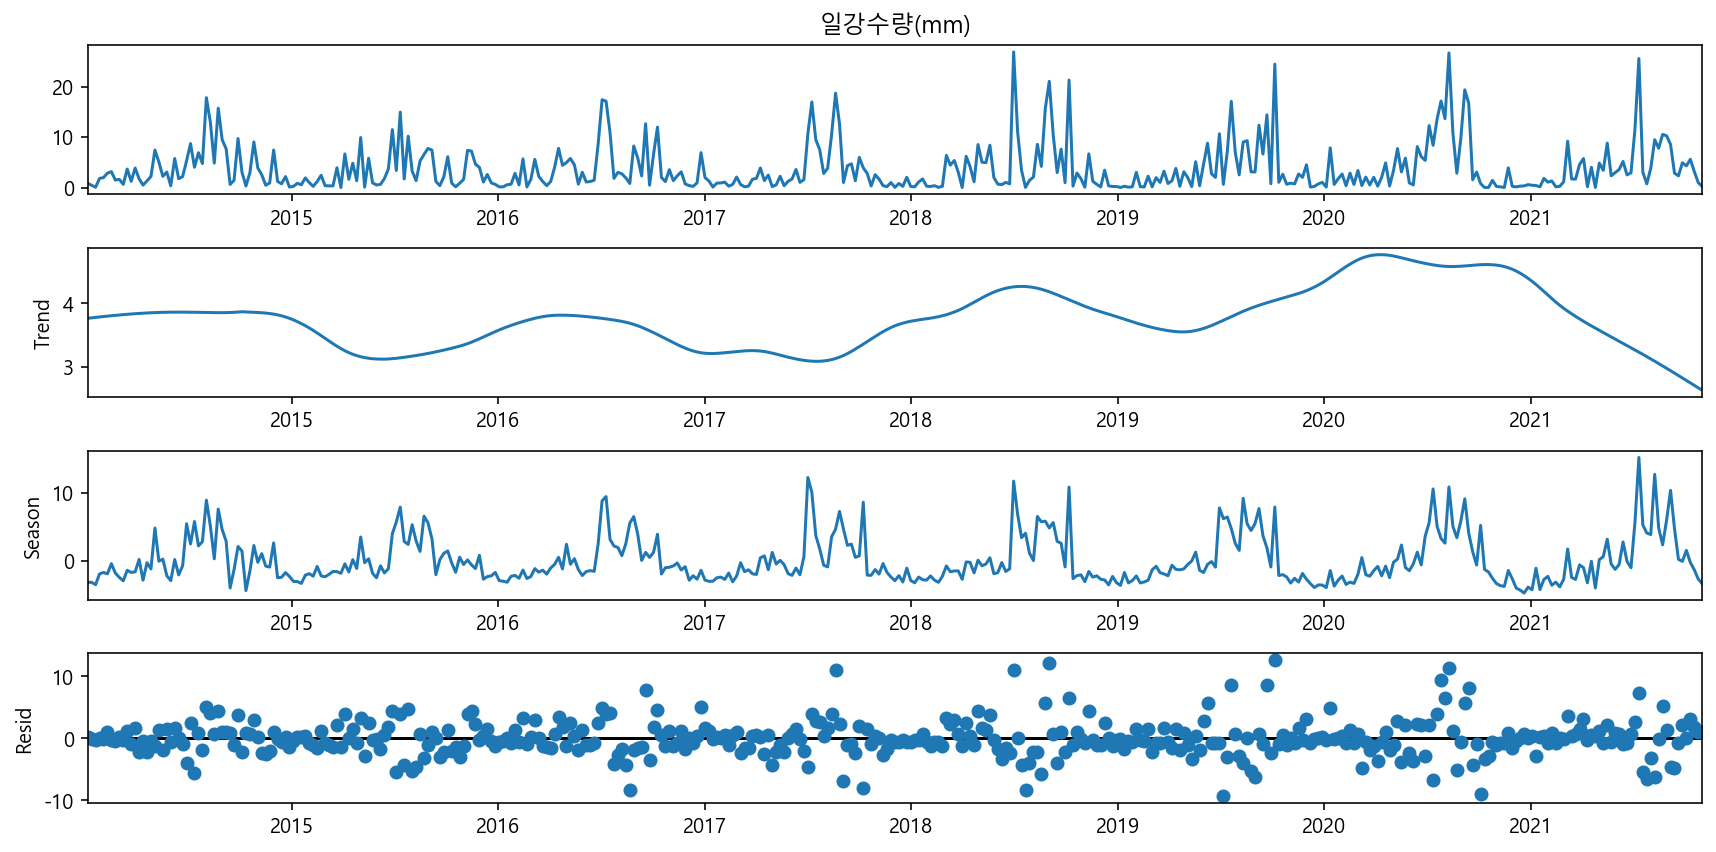

In [60]:
res_rain= STL(cab_total['일강수량(mm)']).fit()
ax=res_rain.plot()
plt.show()

In [61]:
adfuller_test(cab_total['일강수량(mm)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -5.6493
 No. Lags Chosen       = 14
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 9.945235461185938e-07. Rejecting Null Hypothesis.
 => Series is Stationary.


In [62]:
kpss_test(cab_total['일강수량(mm)'])

KPSS Statistic: 0.08585142640798503
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


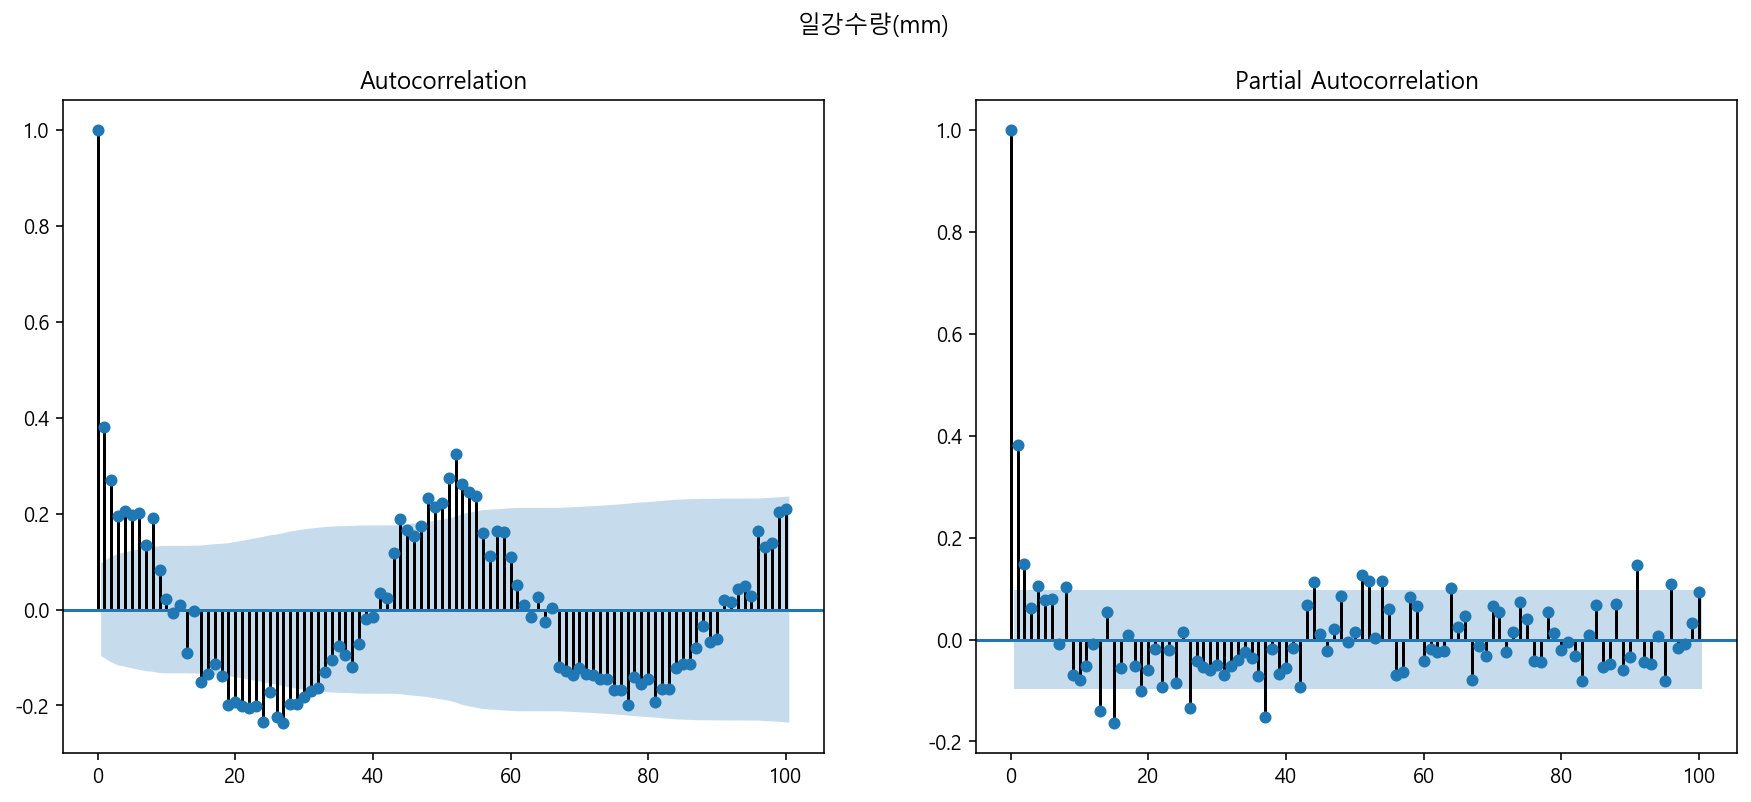

In [63]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("일강수량(mm)")
sm.graphics.tsa.plot_acf(cab_total['일강수량(mm)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['일강수량(mm)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 평균 이슬점온도(°C)

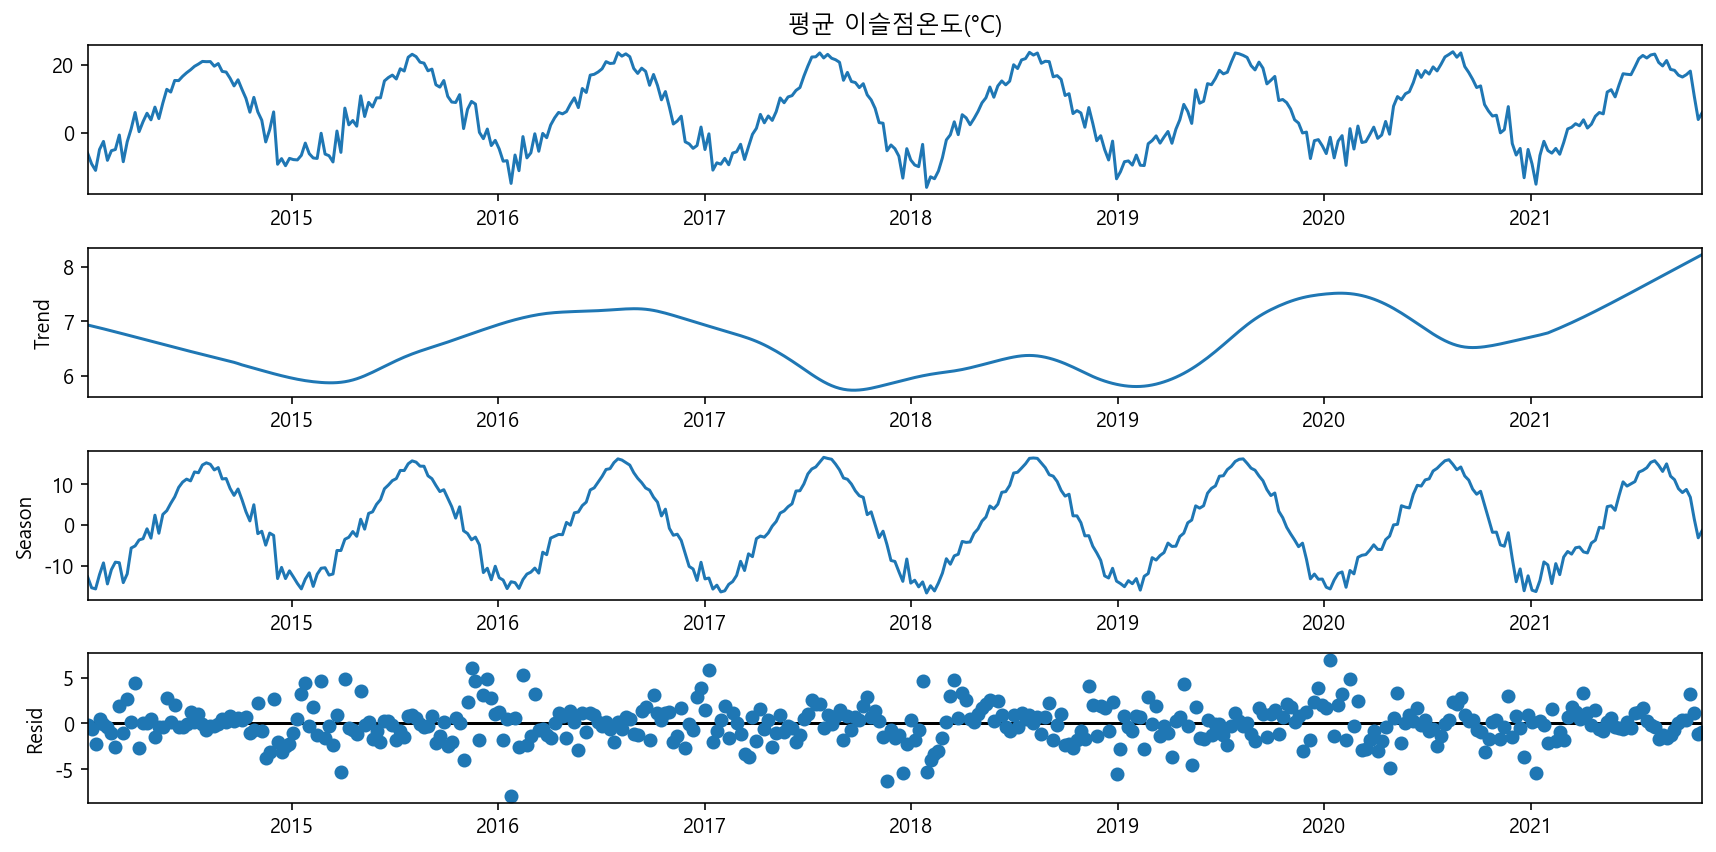

In [64]:
res_dpt= STL(cab_total['평균 이슬점온도(°C)']).fit()
ax=res_dpt.plot()
plt.show()

In [65]:
adfuller_test(cab_total['평균 이슬점온도(°C)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -9.6056
 No. Lags Chosen       = 17
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 1.8696183310464921e-16. Rejecting Null Hypothesis.
 => Series is Stationary.


In [66]:
kpss_test(cab_total['평균 이슬점온도(°C)'])

KPSS Statistic: 0.039511582485061245
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


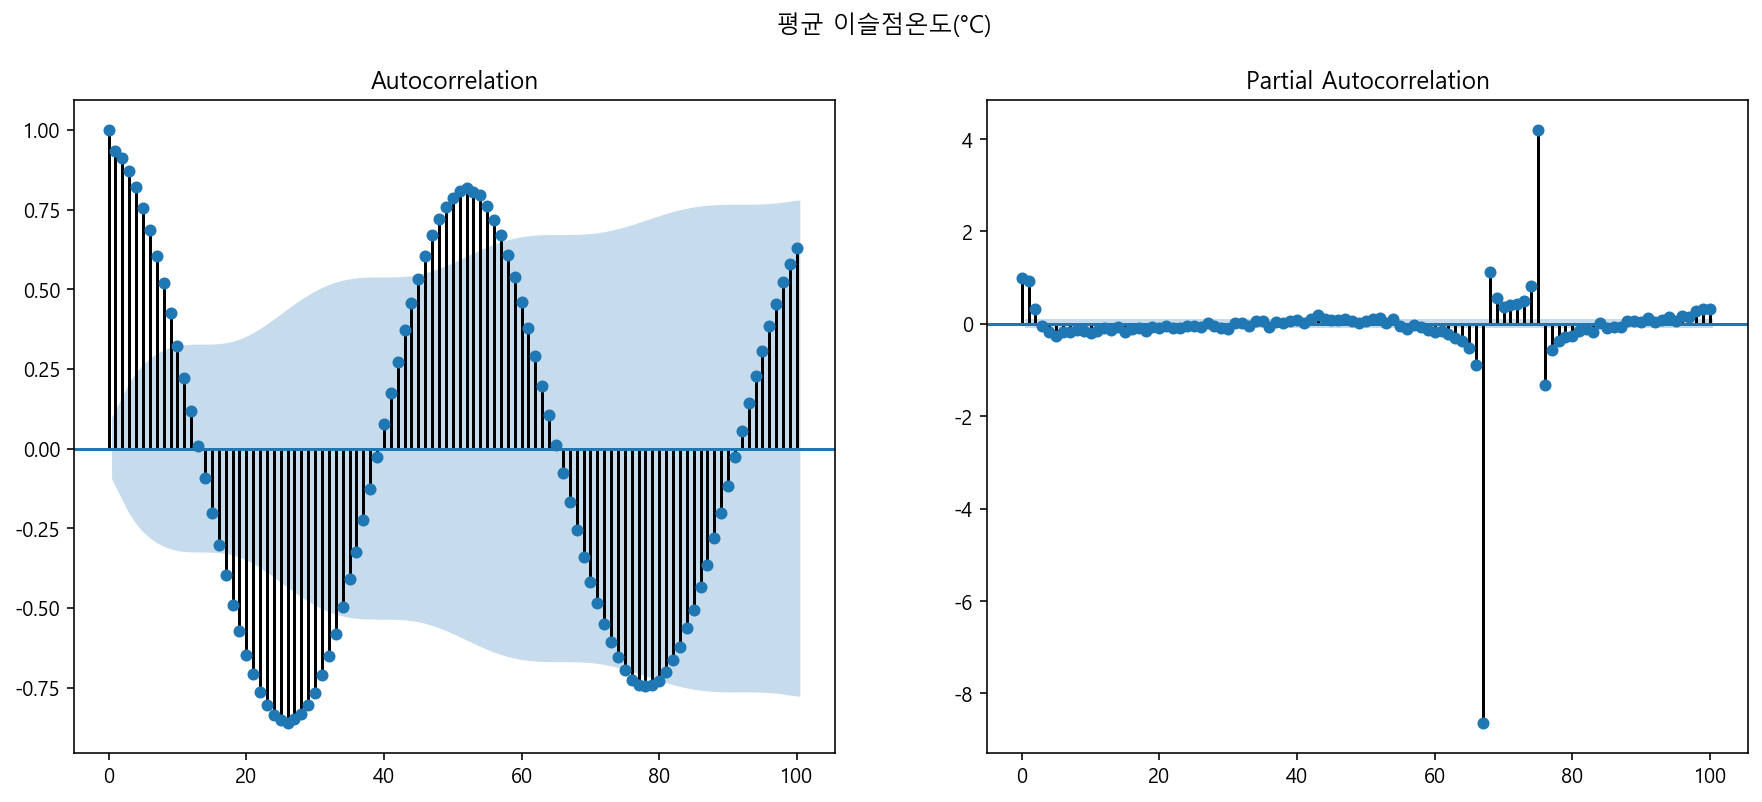

In [67]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("평균 이슬점온도(°C)")
sm.graphics.tsa.plot_acf(cab_total['평균 이슬점온도(°C)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['평균 이슬점온도(°C)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 평균 상대습도(%)

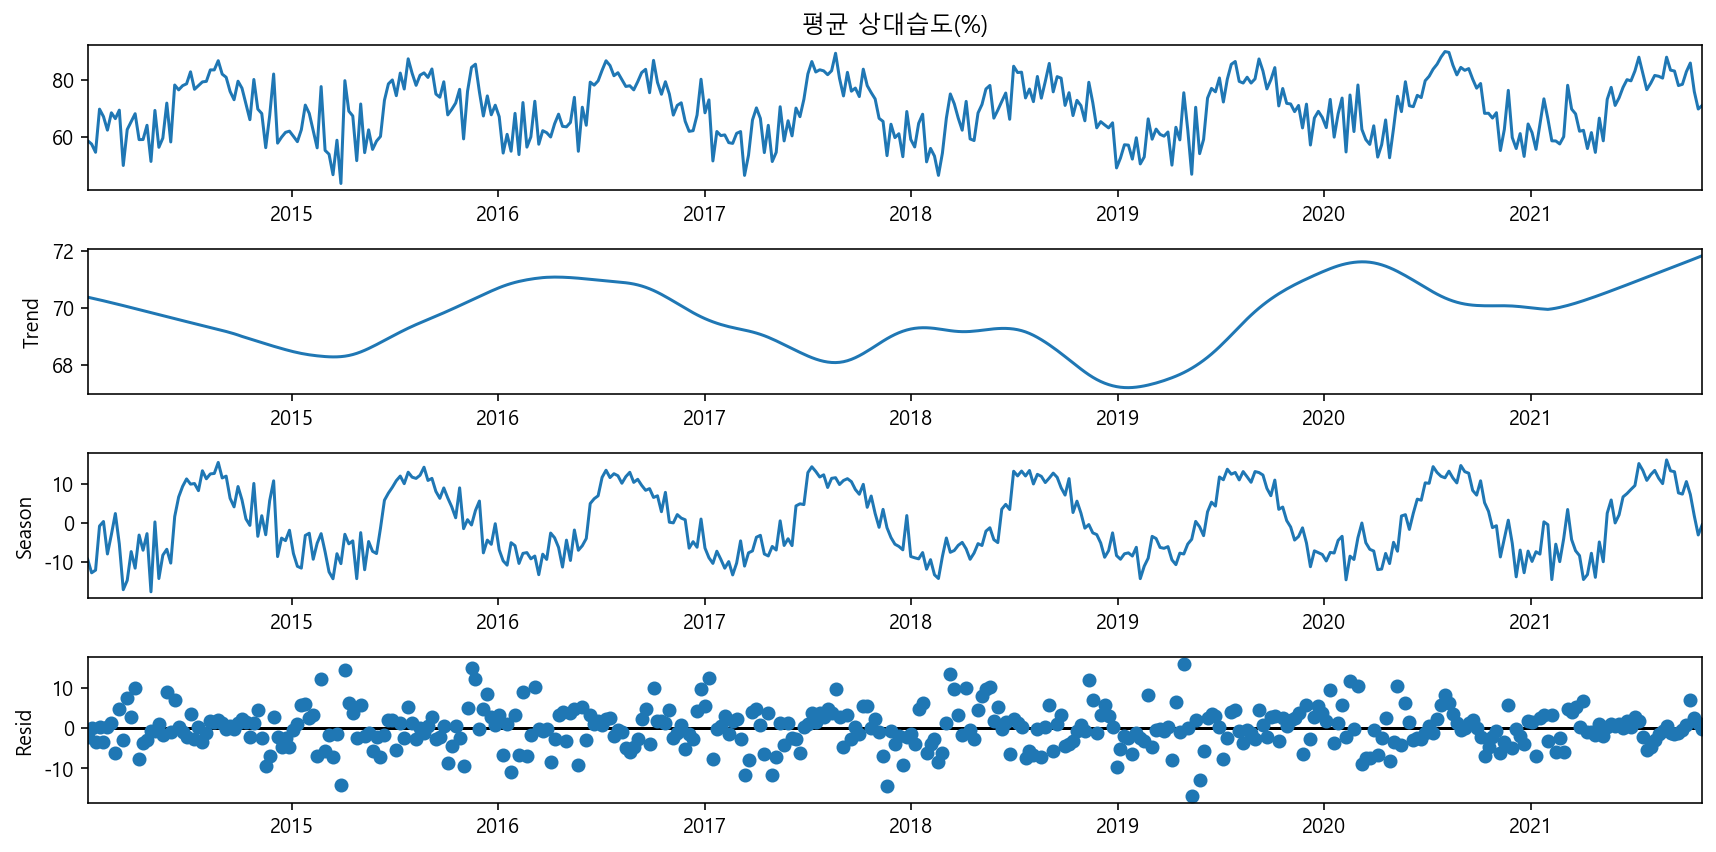

In [68]:
res_hmd= STL(cab_total['평균 상대습도(%)']).fit()
ax=res_hmd.plot()
plt.show()

In [69]:
adfuller_test(cab_total['평균 상대습도(%)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -6.791
 No. Lags Chosen       = 17
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 2.3655304362629275e-09. Rejecting Null Hypothesis.
 => Series is Stationary.


In [70]:
kpss_test(cab_total['평균 상대습도(%)'])

KPSS Statistic: 0.060401038447400975
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


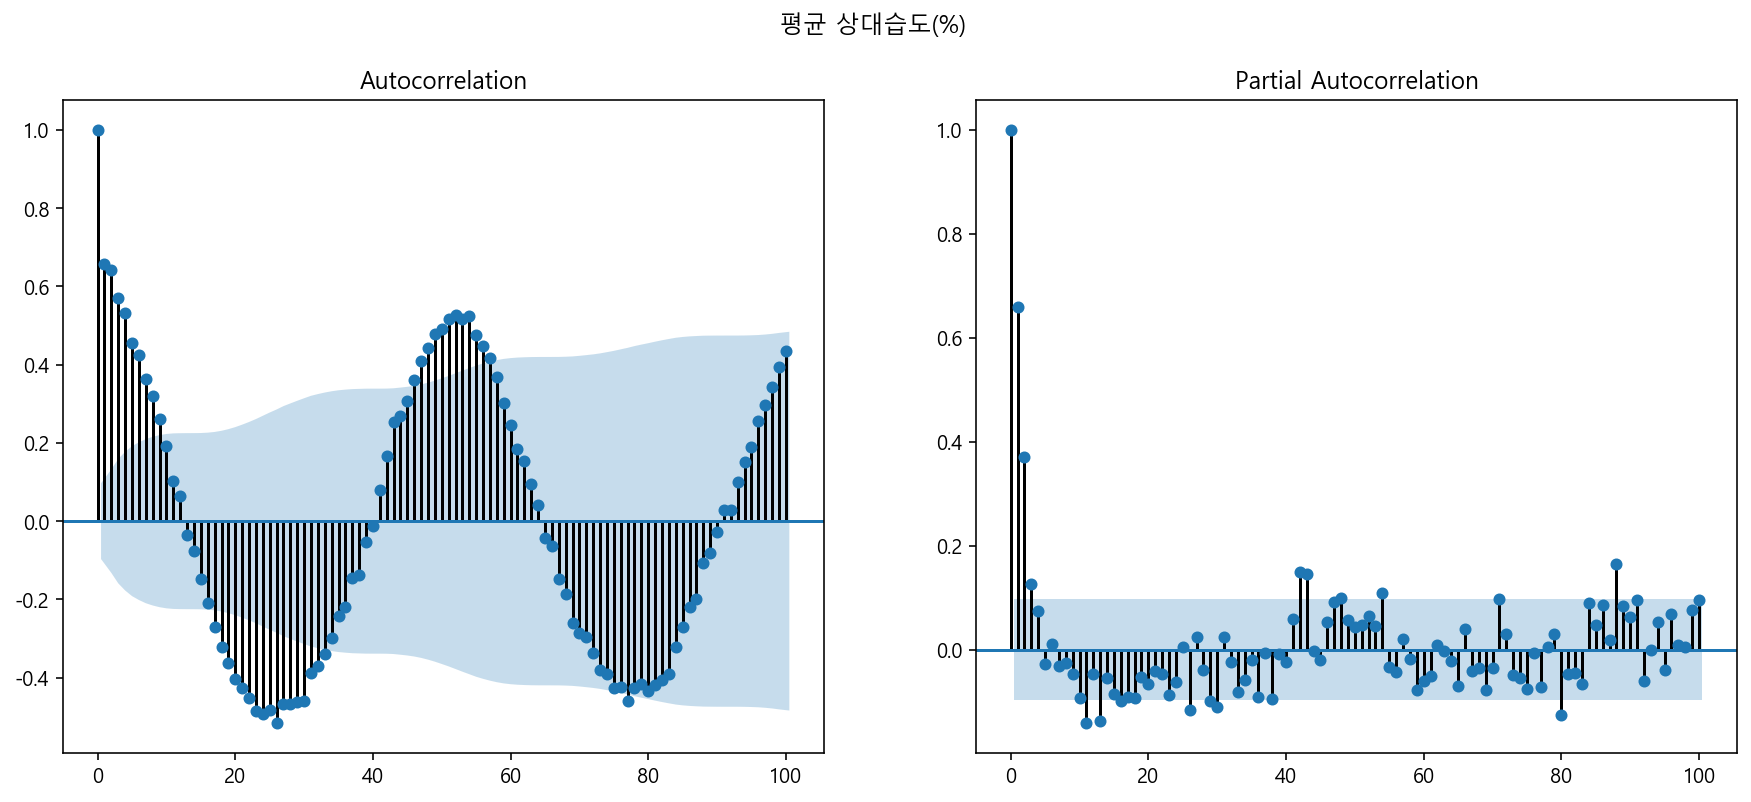

In [71]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("평균 상대습도(%)")
sm.graphics.tsa.plot_acf(cab_total['평균 상대습도(%)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['평균 상대습도(%)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 합계 일사량(MJ/m2)

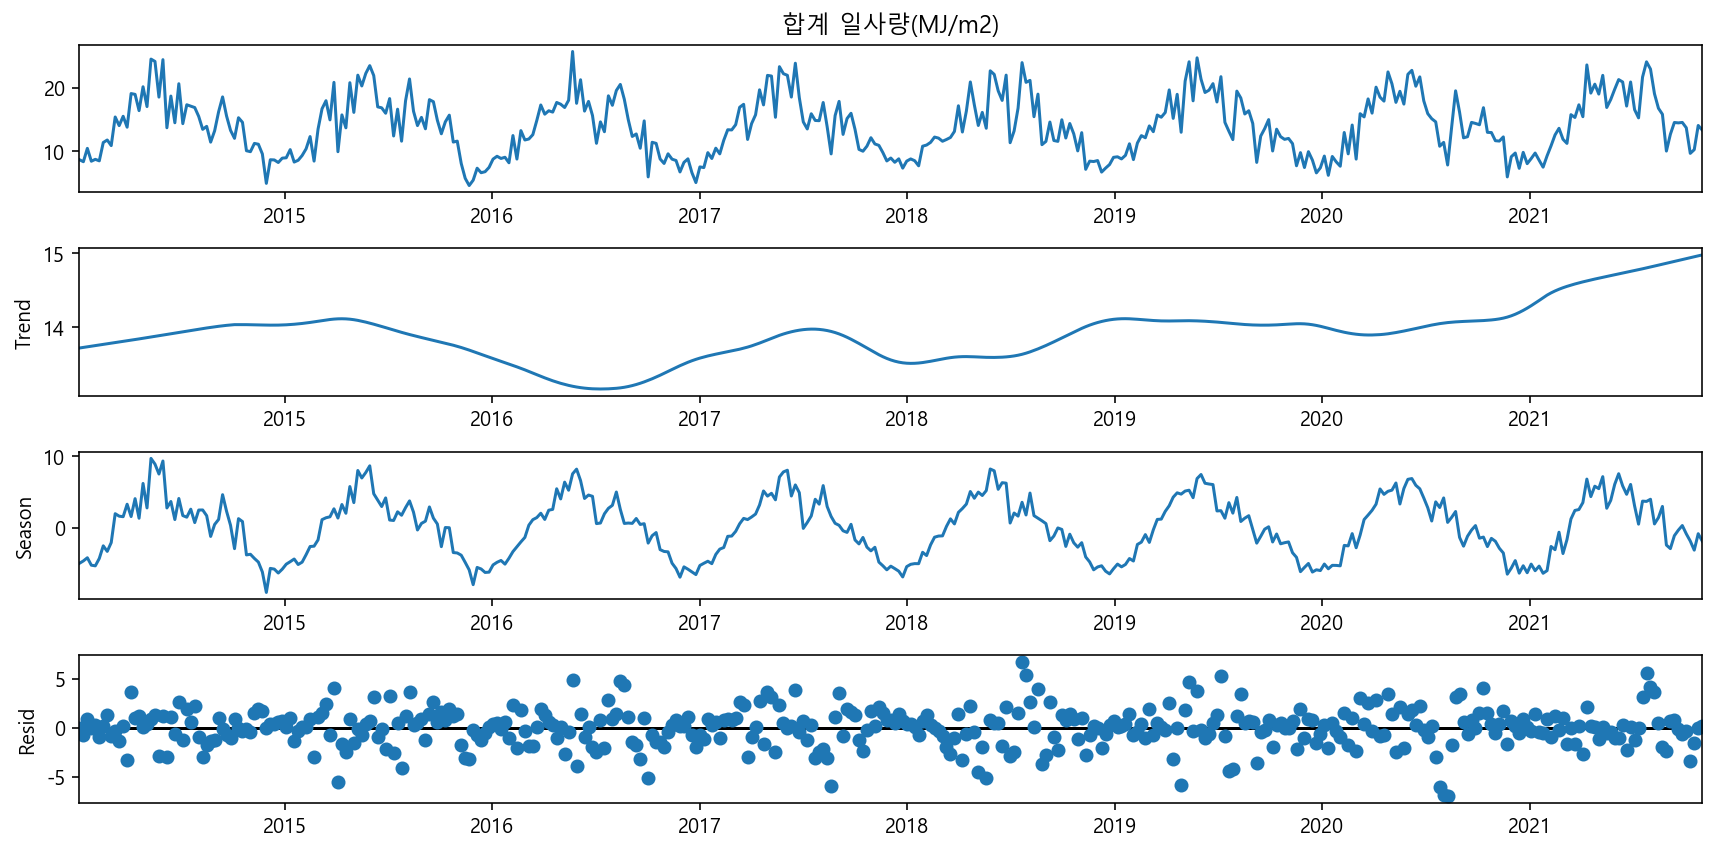

In [72]:
res_solar= STL(cab_total['합계 일사량(MJ/m2)']).fit()
ax=res_solar.plot()
plt.show()

In [73]:
adfuller_test(cab_total['합계 일사량(MJ/m2)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -7.0665
 No. Lags Chosen       = 18
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 5.064821366687192e-10. Rejecting Null Hypothesis.
 => Series is Stationary.


In [74]:
kpss_test(cab_total['합계 일사량(MJ/m2)'])

KPSS Statistic: 0.037479944967183904
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


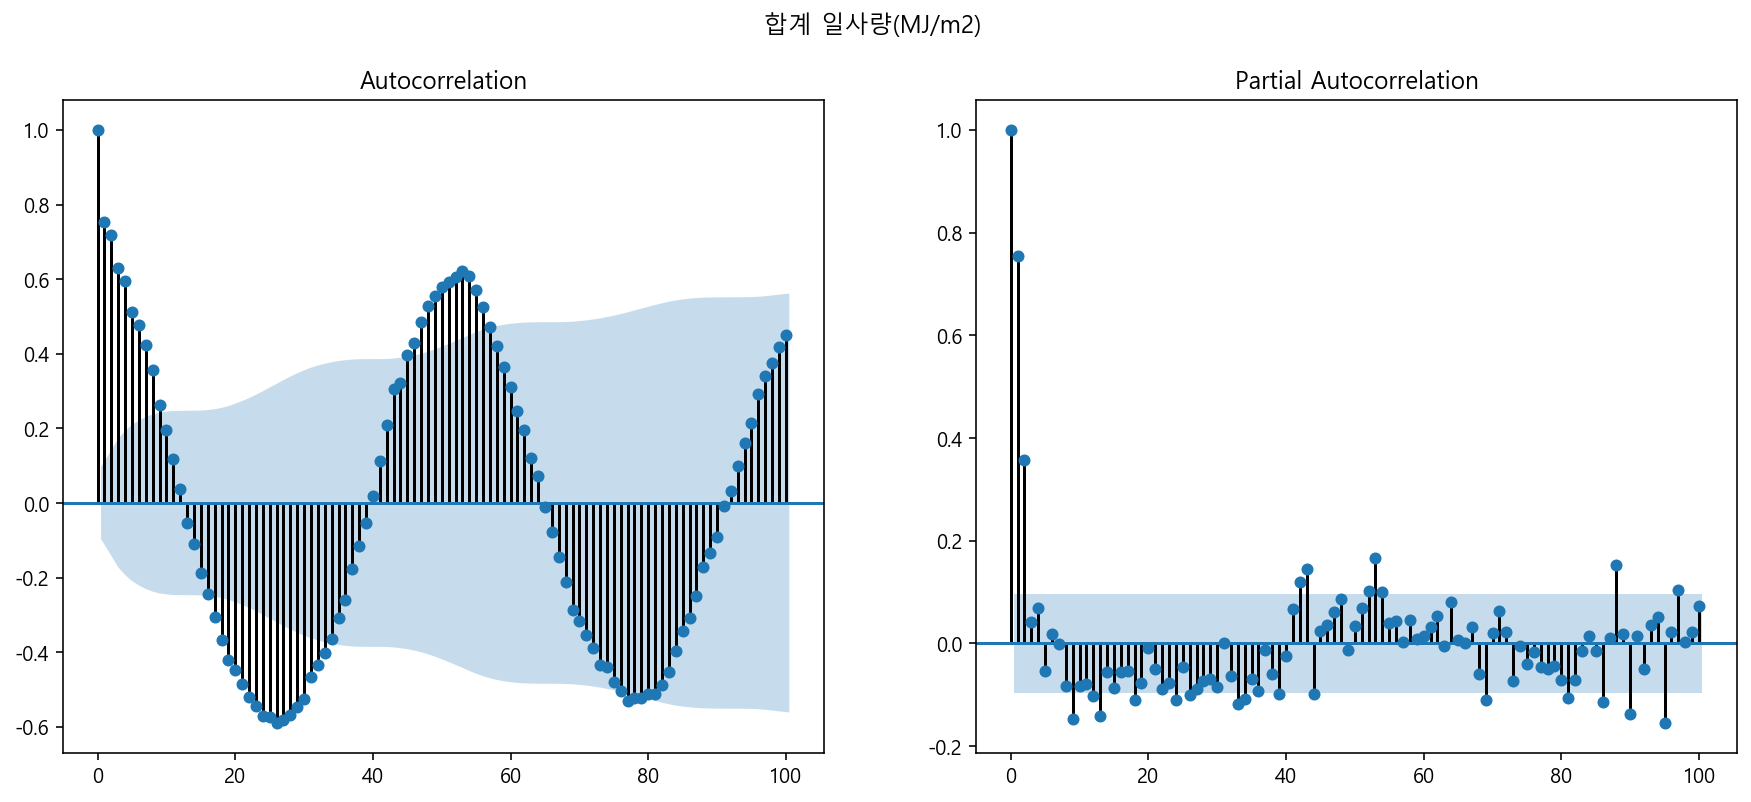

In [75]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("합계 일사량(MJ/m2)")
sm.graphics.tsa.plot_acf(cab_total['합계 일사량(MJ/m2)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['합계 일사량(MJ/m2)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 일 최심적설(cm)

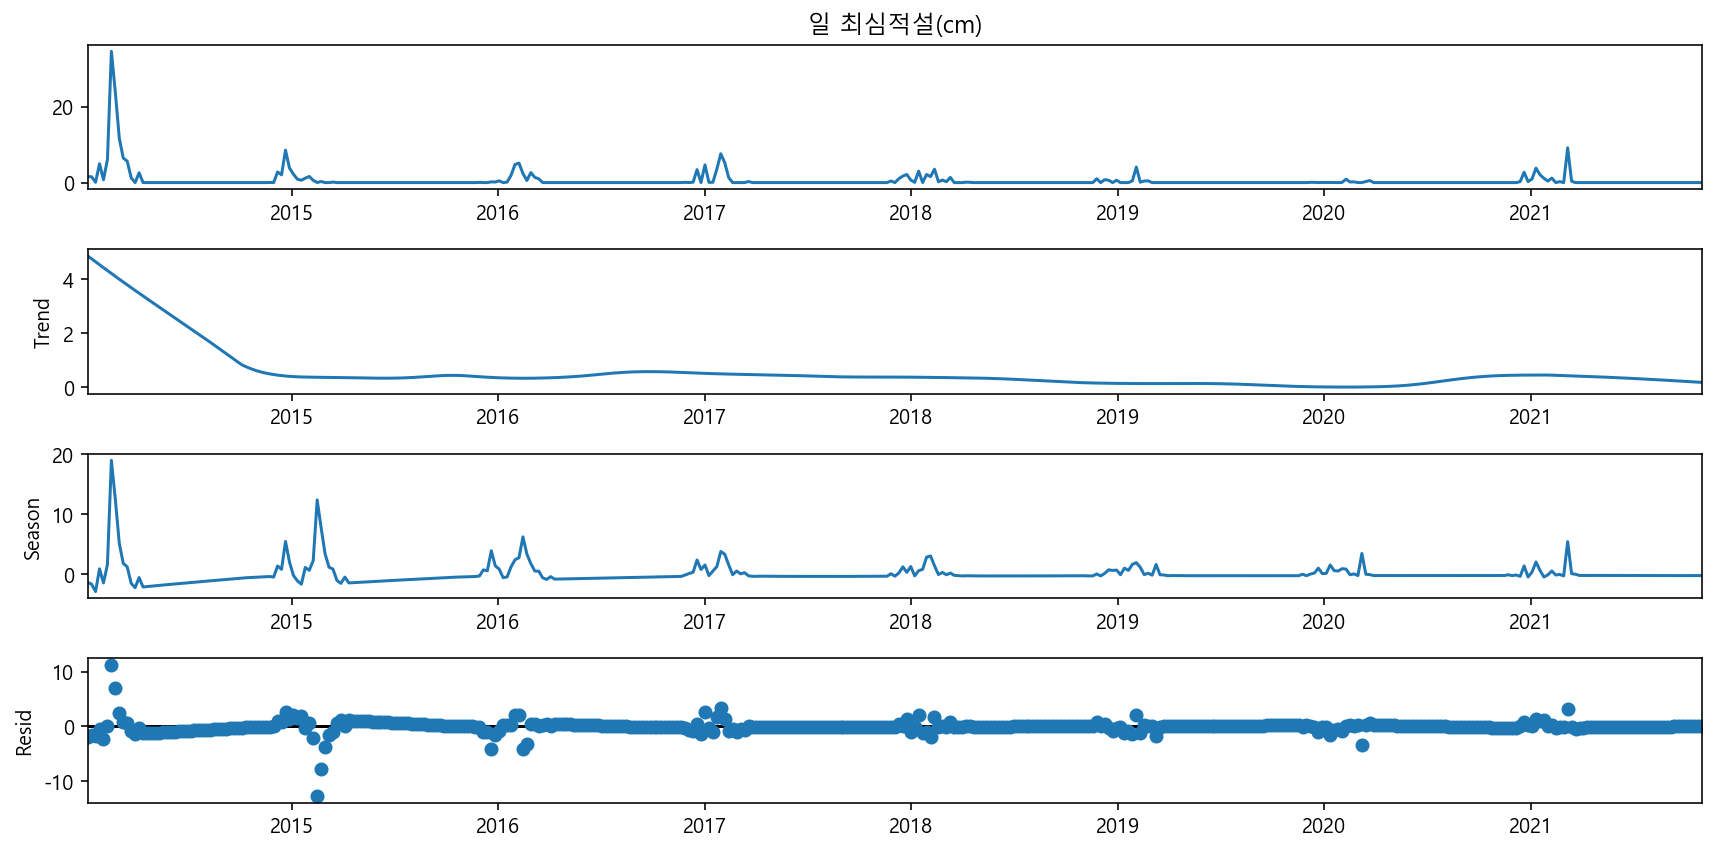

In [76]:
res_snow= STL(cab_total['일 최심적설(cm)']).fit()
ax=res_snow.plot()
plt.show()

In [77]:
adfuller_test(cab_total['일 최심적설(cm)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -7.308
 No. Lags Chosen       = 3
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 1.2863740842155718e-10. Rejecting Null Hypothesis.
 => Series is Stationary.


In [78]:
kpss_test(cab_total['일 최심적설(cm)'])

KPSS Statistic: 0.40545889776812977
p-value: 0.07480219923787511
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


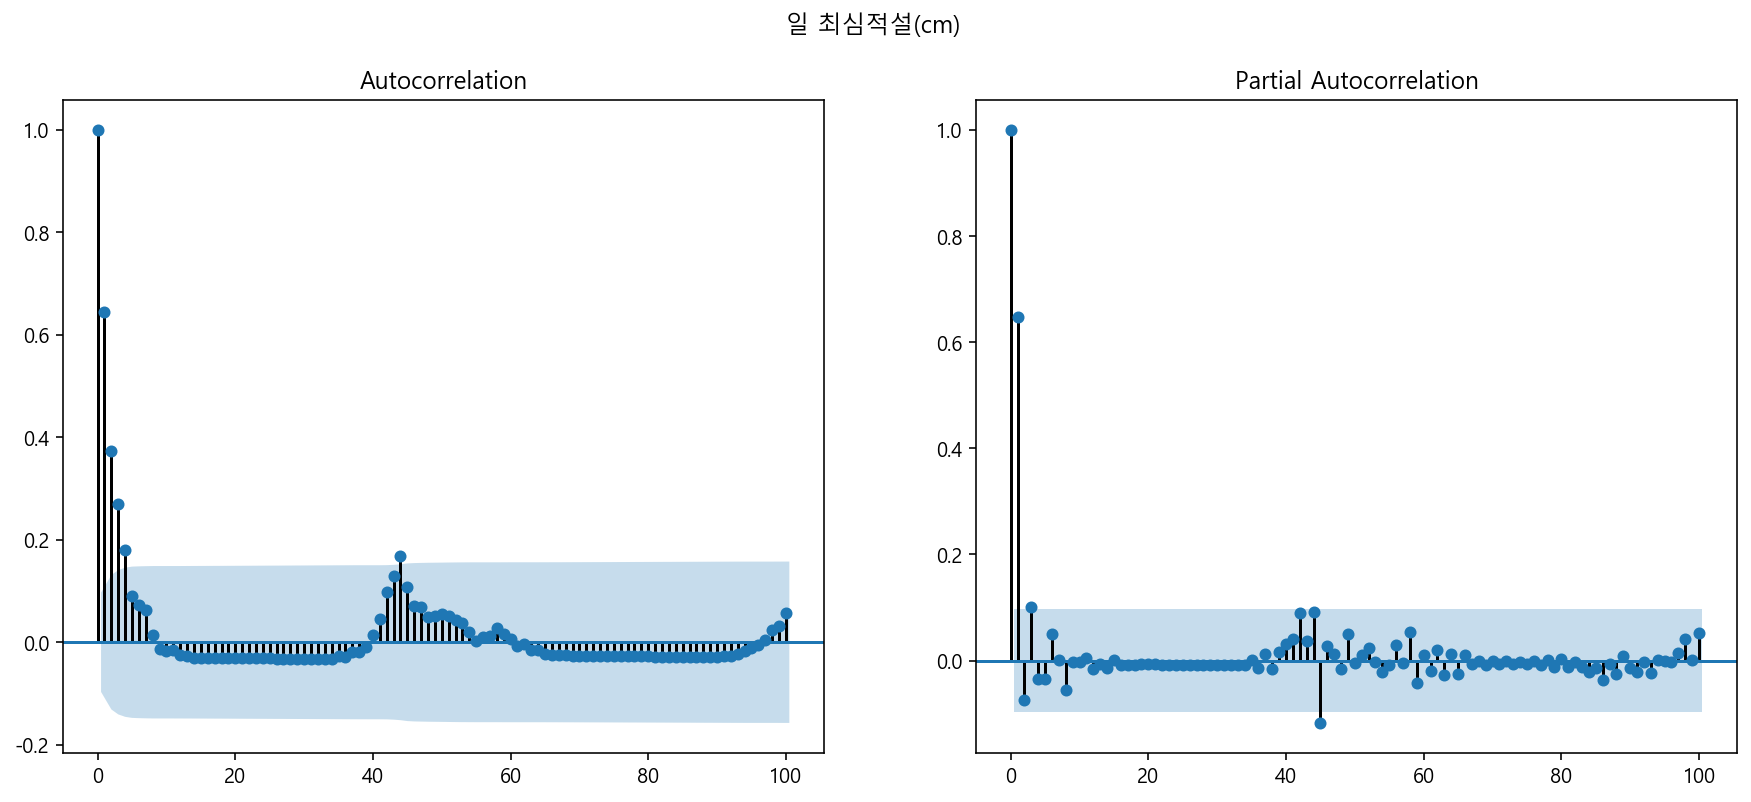

In [79]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("일 최심적설(cm)")
sm.graphics.tsa.plot_acf(cab_total['일 최심적설(cm)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['일 최심적설(cm)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 평균 지면온도(°C)

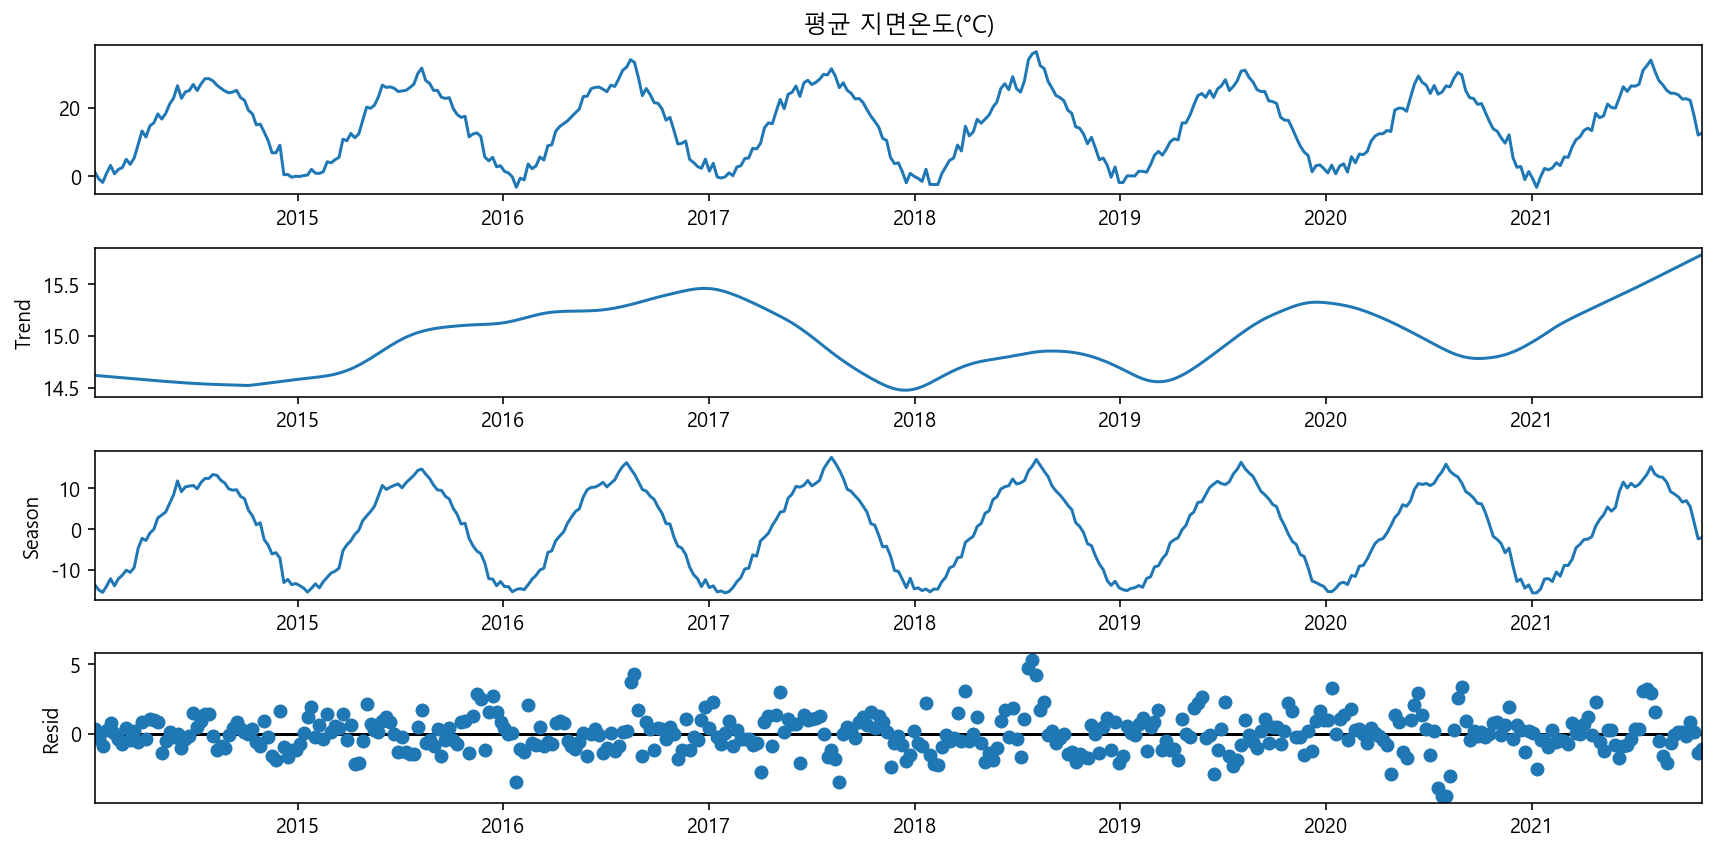

In [80]:
res_ftmp= STL(cab_total['평균 지면온도(°C)']).fit()
ax=res_ftmp.plot()
plt.show()

In [81]:
adfuller_test(cab_total['평균 지면온도(°C)'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -9.9886
 No. Lags Chosen       = 17
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 2.0244936708201154e-17. Rejecting Null Hypothesis.
 => Series is Stationary.


In [82]:
kpss_test(cab_total['평균 지면온도(°C)'])

KPSS Statistic: 0.031091945695841096
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


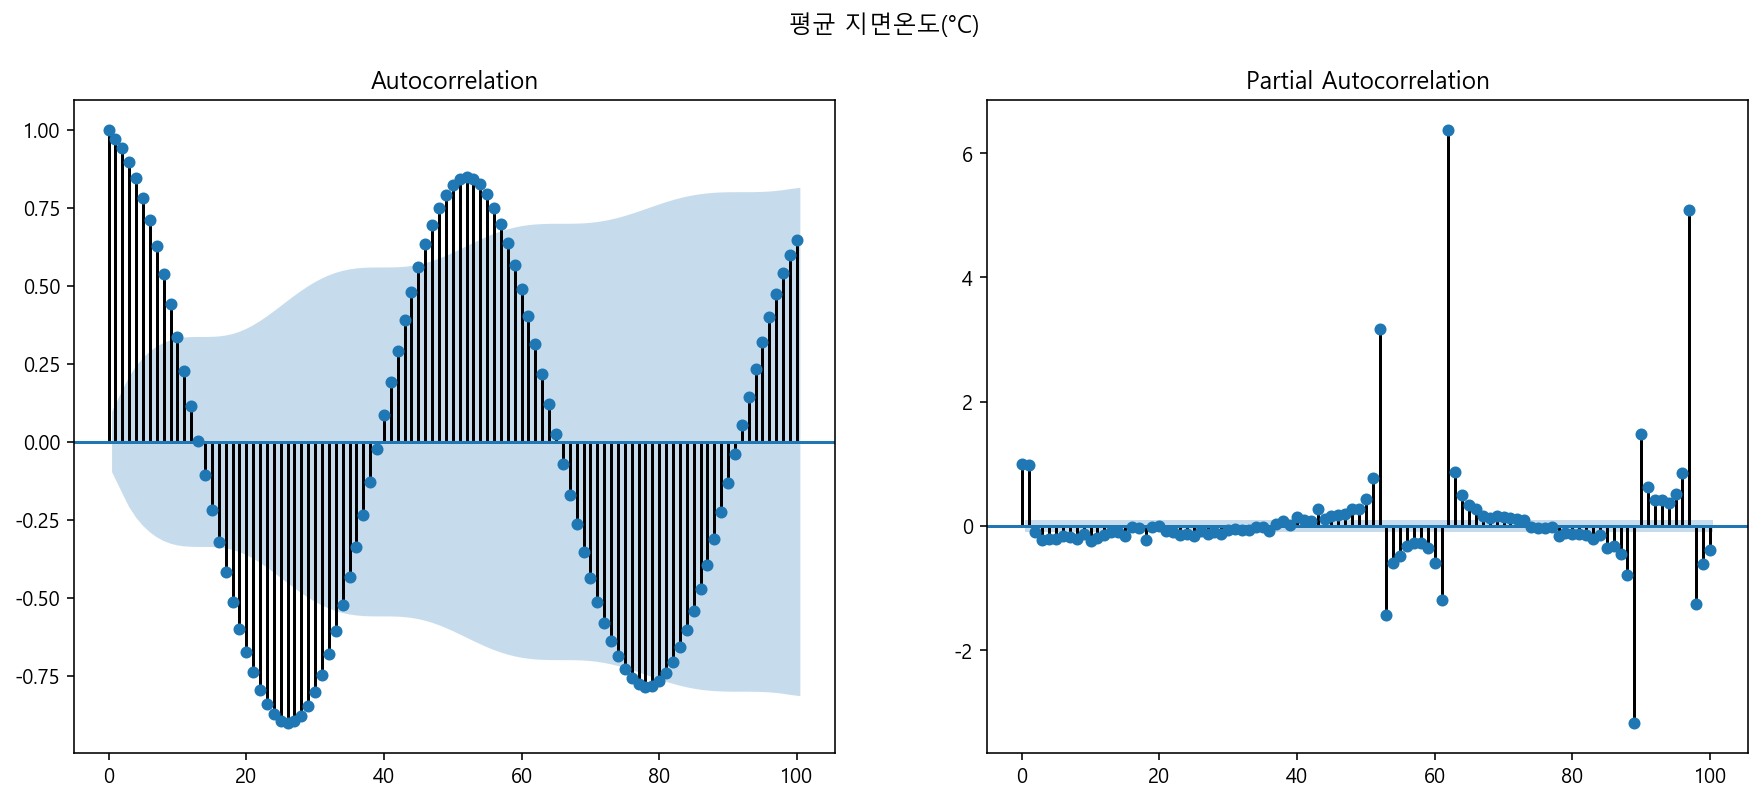

In [83]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("평균 지면온도(°C)")
sm.graphics.tsa.plot_acf(cab_total['평균 지면온도(°C)'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['평균 지면온도(°C)'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

### 매매기준율

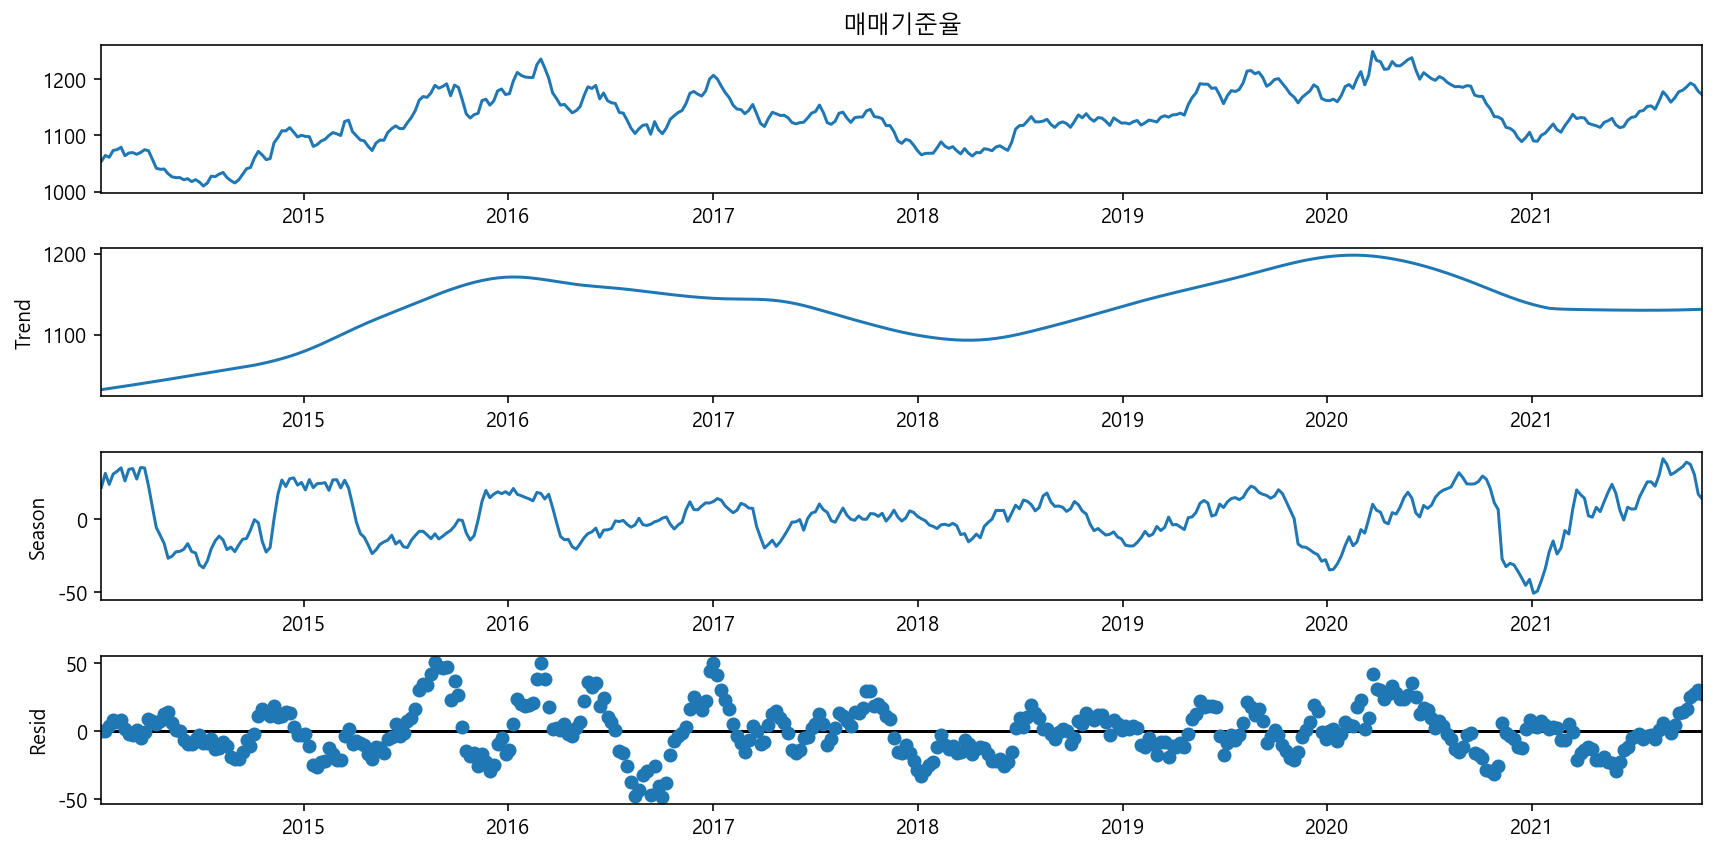

In [84]:
res_dollar= STL(cab_total['매매기준율']).fit()
ax=res_dollar.plot()
plt.show()

In [85]:
adfuller_test(cab_total['매매기준율'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -2.4003
 No. Lags Chosen       = 3
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 0.14165964285475457. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [86]:
kpss_test(cab_total['매매기준율'])

KPSS Statistic: 0.6314657435471
p-value: 0.019775841495718184
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


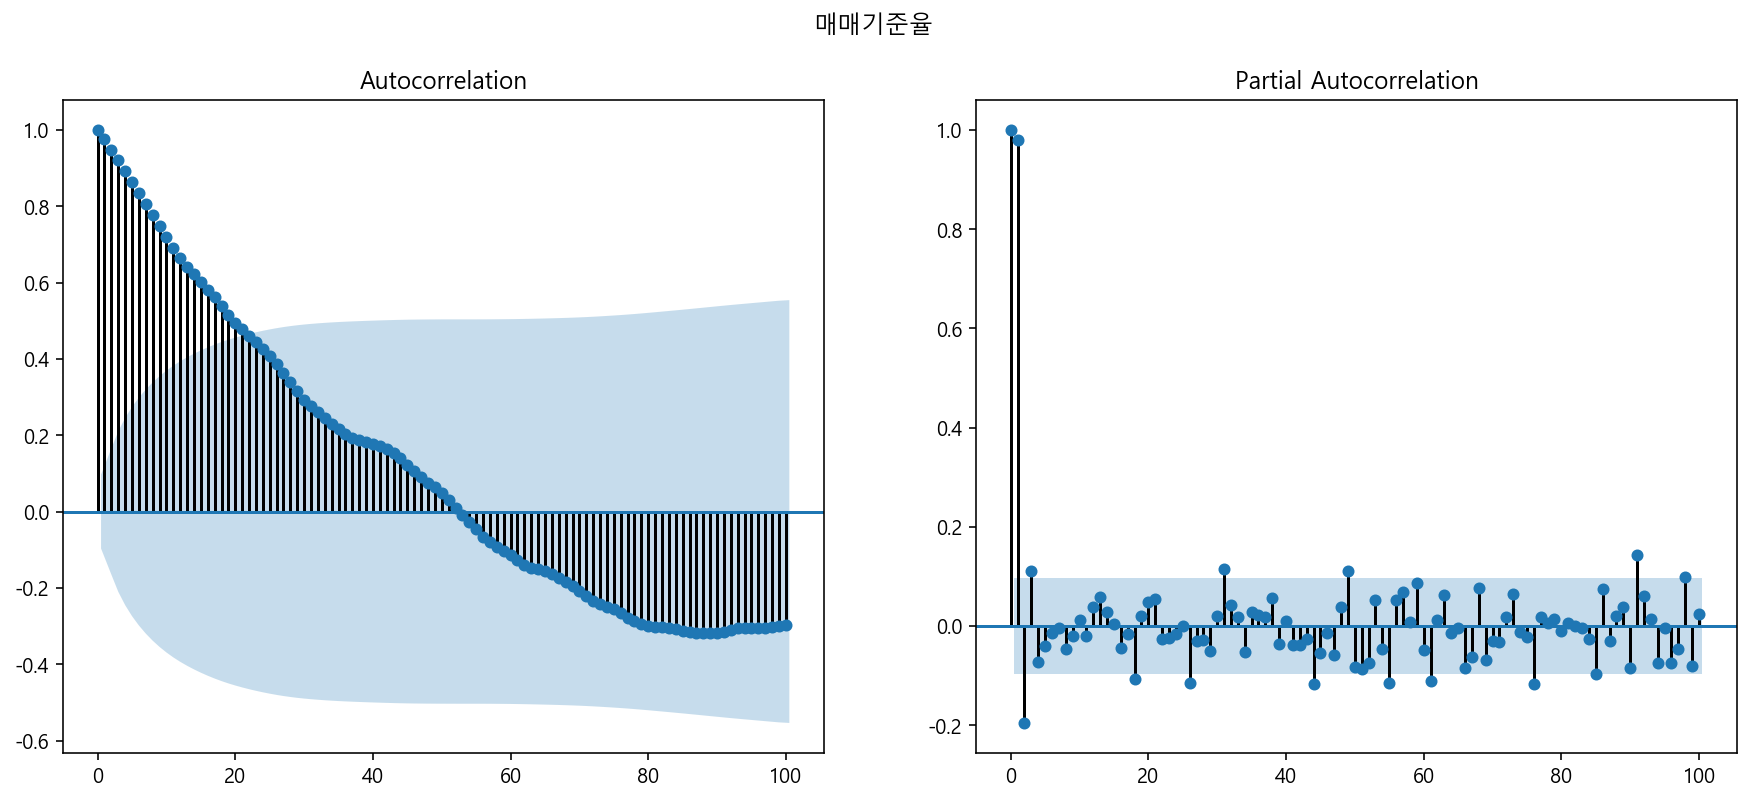

In [87]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("매매기준율")
sm.graphics.tsa.plot_acf(cab_total['매매기준율'].values.squeeze(), lags=100, ax=ax[0])
sm.graphics.tsa.plot_pacf(cab_total['매매기준율'].values.squeeze(), lags=100, ax=ax[1]);
plt.show()

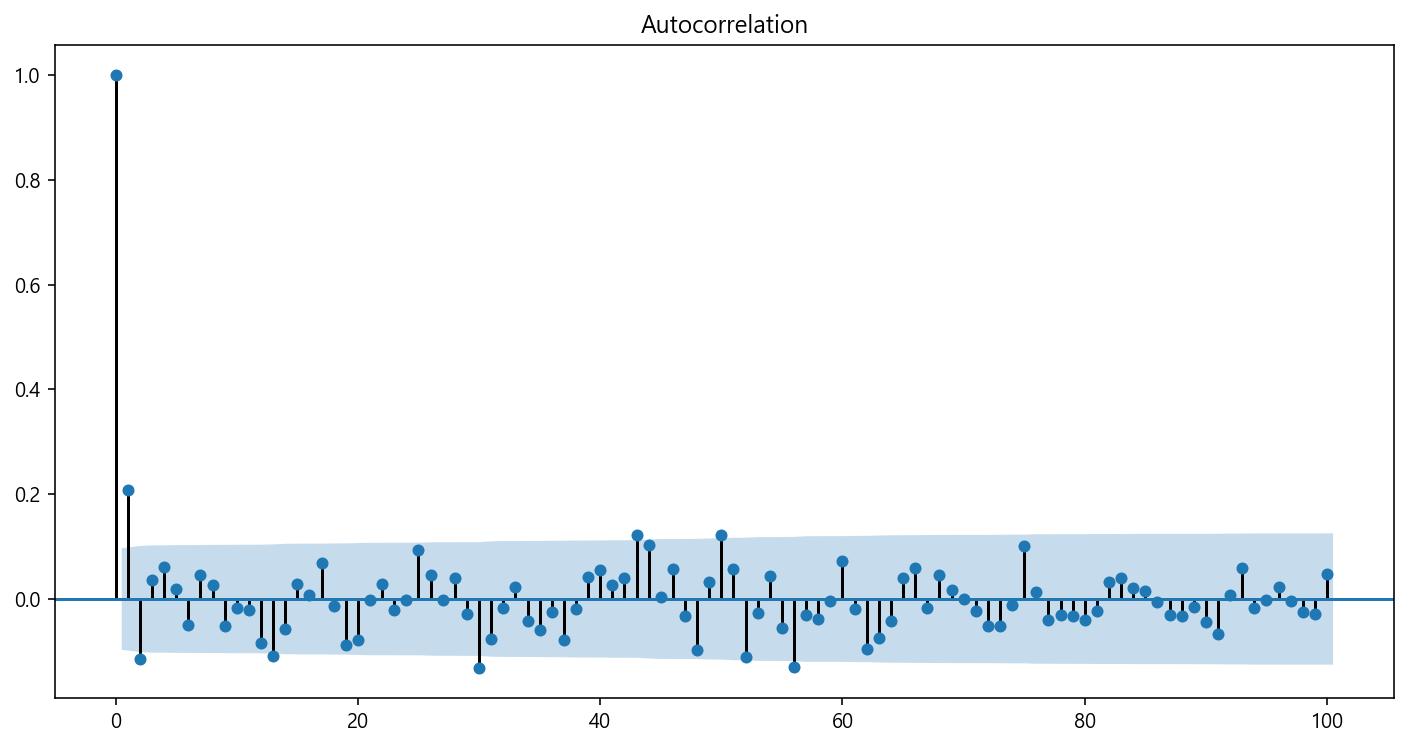

In [88]:
seasonal_lag = 1
sm.graphics.tsa.plot_acf(cab_total['매매기준율'].diff(seasonal_lag).dropna(), lags=100);
plt.show()

In [89]:
adfuller_test(cab_total['매매기준율'].diff(seasonal_lag).dropna())

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -10.7605
 No. Lags Chosen       = 2
 Critical value 1% = -3.447
 Critical value 5% = -2.869
 Critical value 10% = -2.571
 => P-Value = 2.528559786401739e-19. Rejecting Null Hypothesis.
 => Series is Stationary.


In [90]:
kpss_test(cab_total['매매기준율'].diff(seasonal_lag).dropna())

KPSS Statistic: 0.05413070299073052
p-value: 0.1
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


### 정리

|피처|STL|ADF(0.05/0.1)|KPSS(0.05/0.1)|ACF|차분|더미변수
|----|----|----|----|----|-------------------|-----|
|PER_PRICE|계절성|정상/정상|정상/비정상|계절성|KPSS(0.1)/ACF - 계절성 그대로 존재|9월|
|TOT_QTY|계절성|정상/정상|비정상/비정상|계절성|KPSS(0.1)/ACF - 계절성 그대로 존재|11월|
|평균기온|계절성|정상/정상|정상/비정상|계절성|52|X|
|최저기온|계절성|정상/정상|정상/비정상|계절성|52|X|
|최고기온|계절성|정상/정상|정상/비정상|계절성|52|X|
|일강수량|계절성|정상/정상|정상/비정상|계절성|52|X|
|평균 이슬점온도|계절성|정상/정상|정상/비정상|계절성|52|X|
|평균 상대습도|계절성|정상/정상|정상/비정상|계절성|52|X|
|합계 일사량|계절성|정상/정상|정상/비정상|계절성|52|X|
|일 최심적설|계절성|정상/정상|정상/비정상|계절성|52|X|
|평균 지면온도|계절성|정상/정상|정상/비정상|계절성|52|X|
|매매기준율|계절성|비정상/비정상|비정상/비정상|?|1|X|

# 차분/더미변수

## 차분

In [91]:
cab_total_diff = cab_total.copy()

In [92]:
cab_total_diff[['매매기준율']] = cab_total_diff[['매매기준율']].diff(1)

In [93]:
cab_total_diff[['평균기온(°C)','최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 이슬점온도(°C)','평균 상대습도(%)','합계 일사량(MJ/m2)','일 최심적설(cm)','평균 지면온도(°C)']] = cab_total_diff[['평균기온(°C)','최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 이슬점온도(°C)','평균 상대습도(%)','합계 일사량(MJ/m2)','일 최심적설(cm)','평균 지면온도(°C)']].diff(52)

In [94]:
cab_total_diff = cab_total_diff[52:]

In [95]:
cab_total_diff

TOT_QTY   PER_PRICE  평균기온(°C)  최저기온(°C)  최고기온(°C)  일강수량(mm)  \
일자                                                                           
2015-01-04  1728287.00  308.098800 -2.470728 -2.325363 -2.476069 -0.606834   
2015-01-11  2621743.00  297.209227  1.176076  0.980960  1.426637  0.384122   
2015-01-18  2181816.00  302.075111  2.733611  3.307974  2.043923  0.496296   
2015-01-25  2423963.00  297.280777  1.551351  1.693654  1.246070  0.104570   
2015-02-01  2092966.00  342.422036 -4.760418 -2.702653 -6.021557 -0.998884   
...                ...         ...       ...       ...       ...       ...   
2021-10-03  7597955.70  617.564724  2.492611  2.988436  2.309899  3.515116   
2021-10-10  7701011.65  501.742228  6.081444  7.636643  4.390359  5.608289   
2021-10-17  7744317.45  397.339768  2.516004  3.836045  0.681734  3.168357   
2021-10-24  7741324.90  503.654246 -1.897499 -2.125611 -1.459313 -0.441655   
2021-10-31  9256895.70  531.915725  0.204532  0.265143  0.984938 -0.018117   

            평균 이슬점온도(°C)  평균 상대습도(%)  합계 일사량(MJ/m2)  일 최심적설(cm)  평균 지면온도(°C)  \
일자                                                                             
2015-01-04     -1.870939    1.535174       0.296474    0.613981    -1.346993   
2015-01-11      1.159144    0.840576       1.898358   -0.615952     0.928611   
2015-01-18      4.425640    7.931337      -2.154122    0.532679     2.141929   
2015-01-25      1.874739    1.417884       0.147911   -3.793062     1.137221   
2015-02-01     -3.603031    1.119322       0.604006    0.864119    -2.256694   
...                  ...         ...            ...         ...          ...   
2021-10-03      3.303433    4.147103      -0.475461    0.000000     1.395253   
2021-10-10      9.830414   17.689972      -7.187116    0.000000     3.520372   
2021-10-17      4.337001    7.630677      -2.722363    0.000000     1.464860   
2021-10-24     -1.020867    3.177891       1.112637    0.000000    -1.782828   
2021-10-31      0.773283    2.571875       1.675149    0.000000    -0.514238   

                매매기준율           가격  
일자                                  
2015-01-04  -2.057143  1707.122642  
2015-01-11  -0.457143  1707.777358  
2015-01-18 -17.285714  1686.867925  
2015-01-25   3.257143  1667.710692  
2015-02-01   6.185714  1664.000000  
...               ...          ...  
2021-10-03   5.714286  4951.765275  
2021-10-10   7.071429  4453.672111  
2021-10-17  -3.928571  3846.446612  
2021-10-24 -10.785714  3460.793103  
2021-10-31  -6.071429  3402.992740  

[357 rows x 13 columns]

## 더미변수

In [96]:
cab_total_dm = cab_total_diff.copy()

In [97]:
cab_total_dm['가격_dm'] = np.where(cab_total_dm.index.month == 9, 1 ,0)
#cab_total_dm['QTY_DM'] = np.where(cab_total_dm.index.month == 11, 1 ,0)

In [100]:
cab_total_dm.drop(['PER_PRICE'], axis=1, inplace=True)

In [101]:
cab_total_dm

TOT_QTY  평균기온(°C)  최저기온(°C)  최고기온(°C)  일강수량(mm)  평균 이슬점온도(°C)  \
일자                                                                             
2015-01-04  1728287.00 -2.470728 -2.325363 -2.476069 -0.606834     -1.870939   
2015-01-11  2621743.00  1.176076  0.980960  1.426637  0.384122      1.159144   
2015-01-18  2181816.00  2.733611  3.307974  2.043923  0.496296      4.425640   
2015-01-25  2423963.00  1.551351  1.693654  1.246070  0.104570      1.874739   
2015-02-01  2092966.00 -4.760418 -2.702653 -6.021557 -0.998884     -3.603031   
...                ...       ...       ...       ...       ...           ...   
2021-10-03  7597955.70  2.492611  2.988436  2.309899  3.515116      3.303433   
2021-10-10  7701011.65  6.081444  7.636643  4.390359  5.608289      9.830414   
2021-10-17  7744317.45  2.516004  3.836045  0.681734  3.168357      4.337001   
2021-10-24  7741324.90 -1.897499 -2.125611 -1.459313 -0.441655     -1.020867   
2021-10-31  9256895.70  0.204532  0.265143  0.984938 -0.018117      0.773283   

            평균 상대습도(%)  합계 일사량(MJ/m2)  일 최심적설(cm)  평균 지면온도(°C)      매매기준율  \
일자                                                                          
2015-01-04    1.535174       0.296474    0.613981    -1.346993  -2.057143   
2015-01-11    0.840576       1.898358   -0.615952     0.928611  -0.457143   
2015-01-18    7.931337      -2.154122    0.532679     2.141929 -17.285714   
2015-01-25    1.417884       0.147911   -3.793062     1.137221   3.257143   
2015-02-01    1.119322       0.604006    0.864119    -2.256694   6.185714   
...                ...            ...         ...          ...        ...   
2021-10-03    4.147103      -0.475461    0.000000     1.395253   5.714286   
2021-10-10   17.689972      -7.187116    0.000000     3.520372   7.071429   
2021-10-17    7.630677      -2.722363    0.000000     1.464860  -3.928571   
2021-10-24    3.177891       1.112637    0.000000    -1.782828 -10.785714   
2021-10-31    2.571875       1.675149    0.000000    -0.514238  -6.071429   

                     가격  가격_dm  
일자                              
2015-01-04  1707.122642      0  
2015-01-11  1707.777358      0  
2015-01-18  1686.867925      0  
2015-01-25  1667.710692      0  
2015-02-01  1664.000000      0  
...                 ...    ...  
2021-10-03  4951.765275      0  
2021-10-10  4453.672111      0  
2021-10-17  3846.446612      0  
2021-10-24  3460.793103      0  
2021-10-31  3402.992740      0  

[357 rows x 13 columns]

# LSTM

In [175]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns

In [176]:
nrows = cab_total_dm.shape[0]
print(nrows)

357


In [177]:
# Convert the data to numpy values
np_data_unscaled = np.array(cab_total_dm)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

(357, 13)


In [178]:
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

In [179]:
scaler_pred = MinMaxScaler()
df_price = pd.DataFrame(cab_total_dm['가격'])
np_price_scaled = scaler_pred.fit_transform(df_price)

In [180]:
sequence_length = 50

# Prediction Index
index_price = cab_total_dm.columns.get_loc("가격")

In [181]:
index_price

11

In [189]:
# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)
#train_data_len = 352

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [190]:
len(train_data)

286

In [191]:
len(test_data)

121

In [185]:
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_price]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [154]:
# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_price])
print(y_train[0])

(236, 50, 13) (236,)
(71, 50, 13) (71,)
0.04125558812115923
0.04125558812115923


In [155]:
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='rmse')

650 50 13


In [157]:
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 31s 2s/step - loss: 0.9917 - val_loss: 0.0860
Epoch 2/50
15/15 [==============================] - 25s 2s/step - loss: 0.0277 - val_loss: 0.0453
Epoch 3/50
15/15 [==============================] - 25s 2s/step - loss: 0.0186 - val_loss: 0.0342
Epoch 4/50
15/15 [==============================] - 25s 2s/step - loss: 0.0170 - val_loss: 0.0338
Epoch 5/50
15/15 [==============================] - 26s 2s/step - loss: 0.0140 - val_loss: 0.0311
Epoch 6/50
15/15 [==============================] - 27s 2s/step - loss: 0.0119 - val_loss: 0.0240
Epoch 7/50
15/15 [==============================] - 24s 2s/step - loss: 0.0102 - val_loss: 0.0191
Epoch 8/50
15/15 [==============================] - 23s 2s/step - loss: 0.0097 - val_loss: 0.0205
Epoch 9/50
15/15 [==============================] - 24s 2s/step - loss: 0.0092 - val_loss: 0.0184
Epoch 10/50
15/15 [==============================] - 24s 2s/step - loss: 0.0088 - val_loss: 0.0189
Epoch 11/50
15/15 [

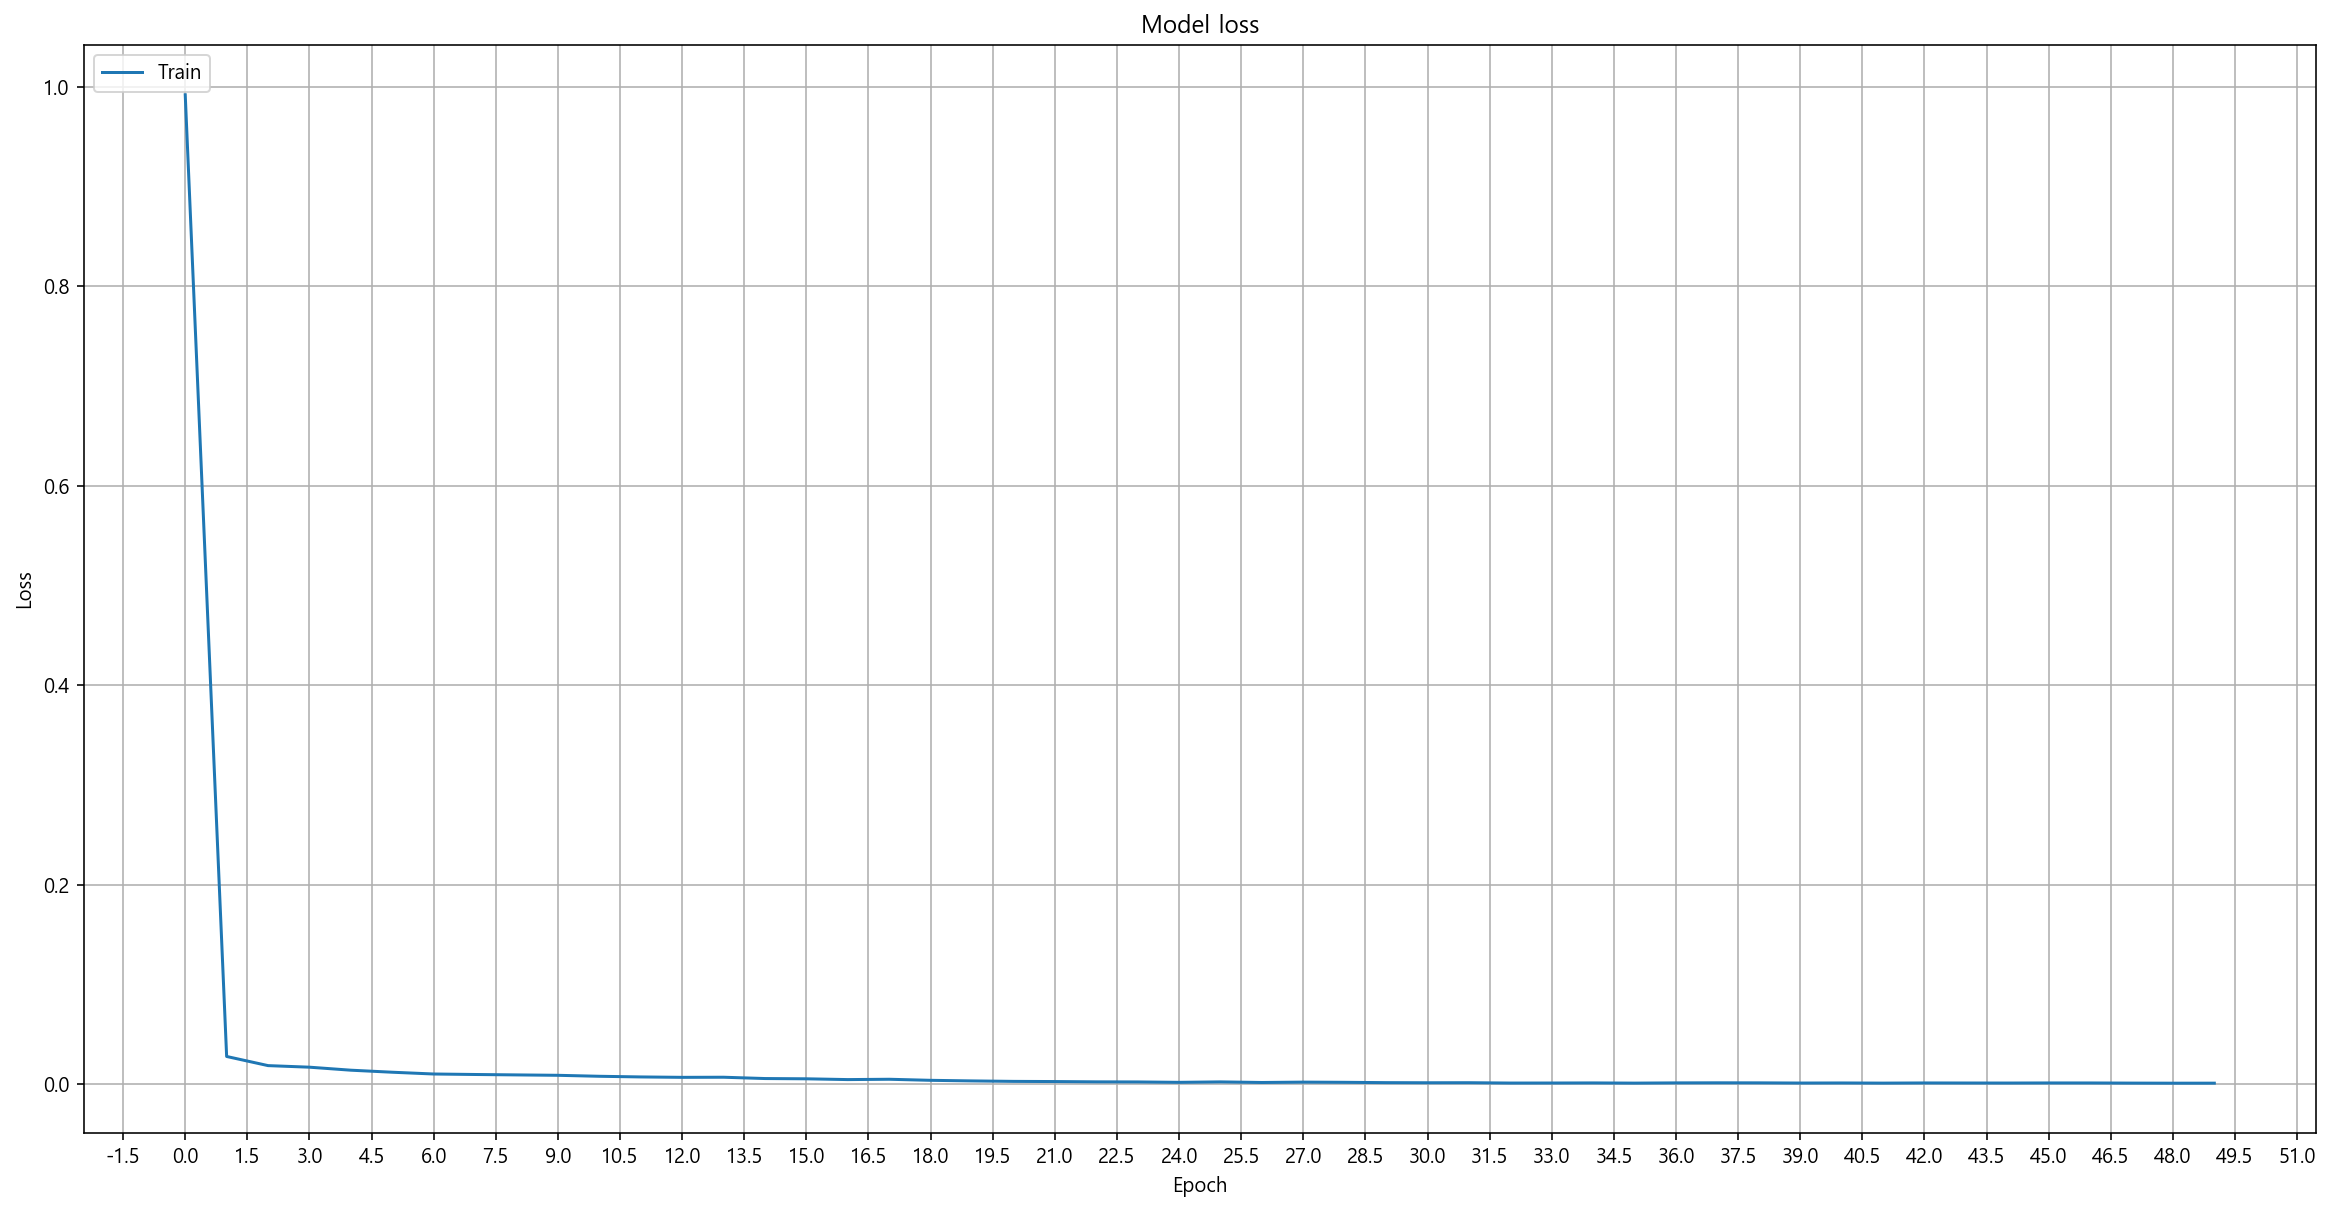

In [158]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [165]:
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 510.76
Mean Absolute Percentage Error (MAPE): 10.66 %
Median Absolute Percentage Error (MDAPE): 9.9 %


In [166]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5
    return({'rmse':rmse})

In [168]:
forecast_accuracy(y_pred, y_test_unscaled )

{'rmse': 734.6812540014502}

In [172]:
y_pred

array([[3515.645 ],
       [3544.326 ],
       [3584.9124],
       [3631.1853],
       [3763.7485],
       [4031.0815],
       [4390.0186],
       [4708.1924],
       [5139.938 ],
       [5727.3364],
       [6518.7446],
       [7165.4644],
       [7550.3613],
       [7639.101 ],
       [7330.5957],
       [6926.341 ],
       [6234.413 ],
       [5192.9663],
       [4080.1418],
       [3307.8555],
       [2873.554 ],
       [2715.3076],
       [2710.5117],
       [2823.4163],
       [2933.8865],
       [2942.8333],
       [2919.3052],
       [2782.1082],
       [2590.3489],
       [2515.0974],
       [2428.4165],
       [2390.316 ],
       [2465.4897],
       [2606.7668],
       [2834.3206],
       [3015.2688],
       [3235.4875],
       [3384.4563],
       [3488.8245],
       [3559.2244],
       [3619.1738],
       [3621.09  ],
       [3646.9146],
       [3685.4272],
       [3703.724 ],
       [3674.1812],
       [3698.568 ],
       [3526.1309],
       [3232.8376],
       [2934.5142],


In [170]:
y_test_unscaled

array([[3692.95505024],
       [3715.88418826],
       [3706.64516129],
       [4006.80967889],
       [4507.52364533],
       [5052.06834382],
       [5212.57915449],
       [5975.13697323],
       [6662.17213115],
       [7797.3       ],
       [8046.85536723],
       [8348.41750387],
       [9112.18071919],
       [9492.20614035],
       [9671.75438596],
       [9205.25862069],
       [7019.3272745 ],
       [4898.29703569],
       [3966.74409562],
       [3327.61549925],
       [2946.26060606],
       [2790.58852459],
       [2812.77419355],
       [2649.9448645 ],
       [2487.11553544],
       [2485.49283154],
       [2359.01209677],
       [2275.22011605],
       [2408.55659063],
       [2416.26666667],
       [2406.26666667],
       [2524.53841808],
       [2755.43333333],
       [2946.22222222],
       [2987.2       ],
       [3451.76666667],
       [3616.75      ],
       [3638.82542373],
       [3754.82372881],
       [3816.46666667],
       [3913.83333333],
       [4059.725

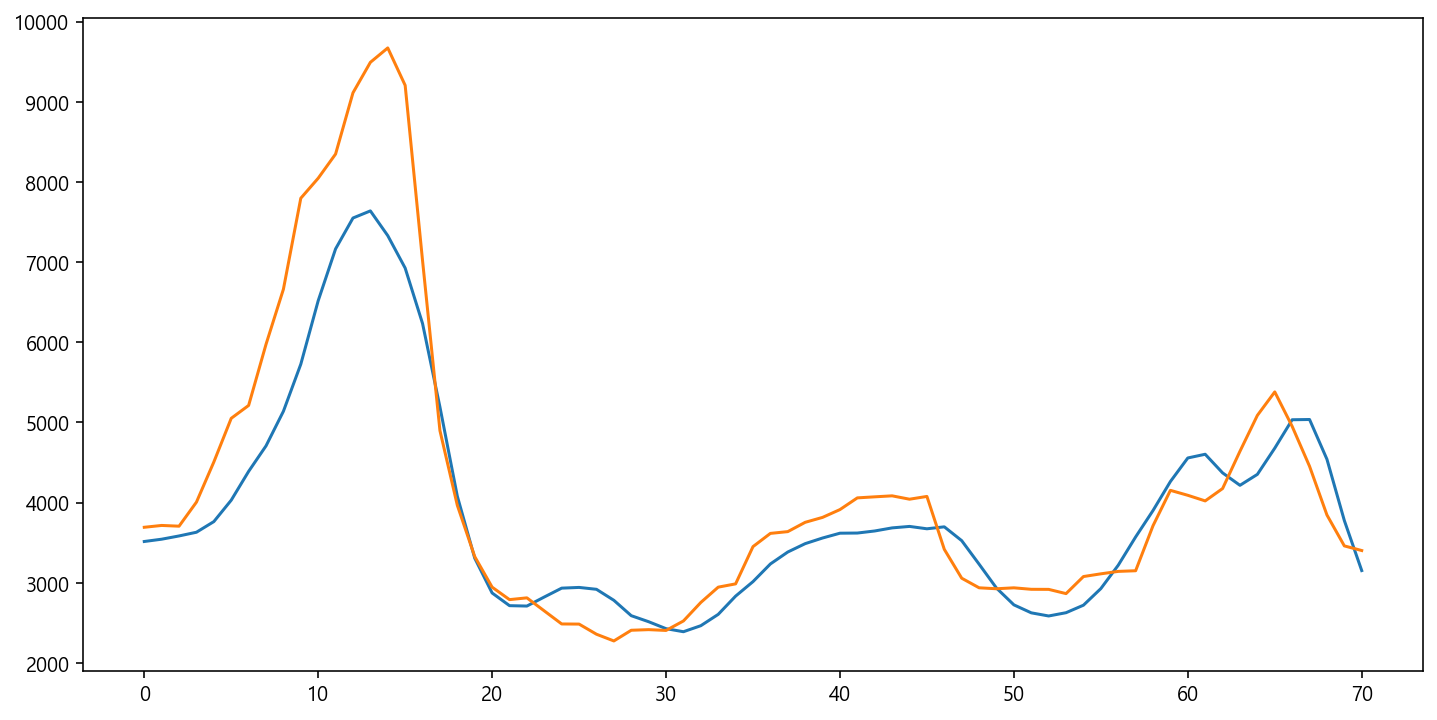

In [174]:
plt.plot(y_pred)
plt.plot(y_test_unscaled)